In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [109]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [110]:
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [111]:
df.shape

(1525, 9)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [114]:
df.describe(include='object').T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [115]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [116]:
df.duplicated().sum()

8

In [117]:
col_list1=list(df.select_dtypes('object').columns)
col_list1

['vote', 'gender']

In [118]:
col_list2=list(df)
col_list2.remove('vote')
col_list2.remove('gender')
col_list2

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

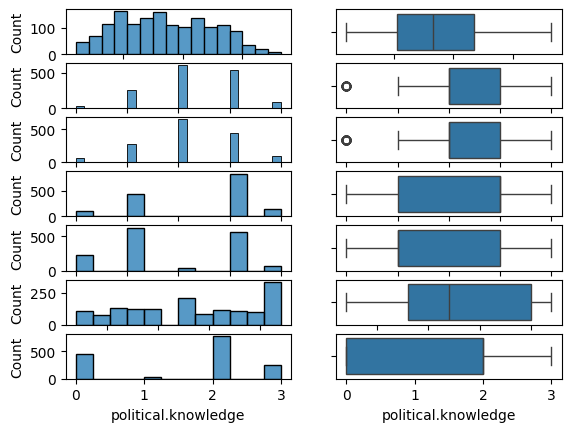

In [119]:
    fig,axes=plt.subplots(nrows=7,ncols=2)
    for i in range(0,len(col_list2)):
      sns.histplot(data=df,x=df[col_list2[i]],ax=axes[i][0])
      sns.boxplot(data=df,x=df[col_list2[i]],ax=axes[i][1])

    plt.show()

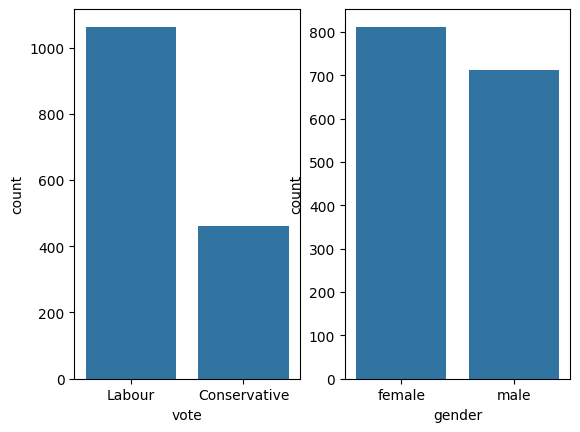

In [120]:
fig,axes=plt.subplots(ncols=2)
for i in range(0,len(col_list1)):
  sns.countplot(data=df,x=col_list1[i],ax=axes[i])

plt.show()

In [121]:
def uni_plot(data,feature):
    fig,axes=plt.subplots(figsize=(50,20),ncols=2)
    sns.histplot(data=data, x=feature,ax=axes[0],kde=True)
    sns.boxplot(data=data, x=feature,ax=axes[1])
    plt.show()




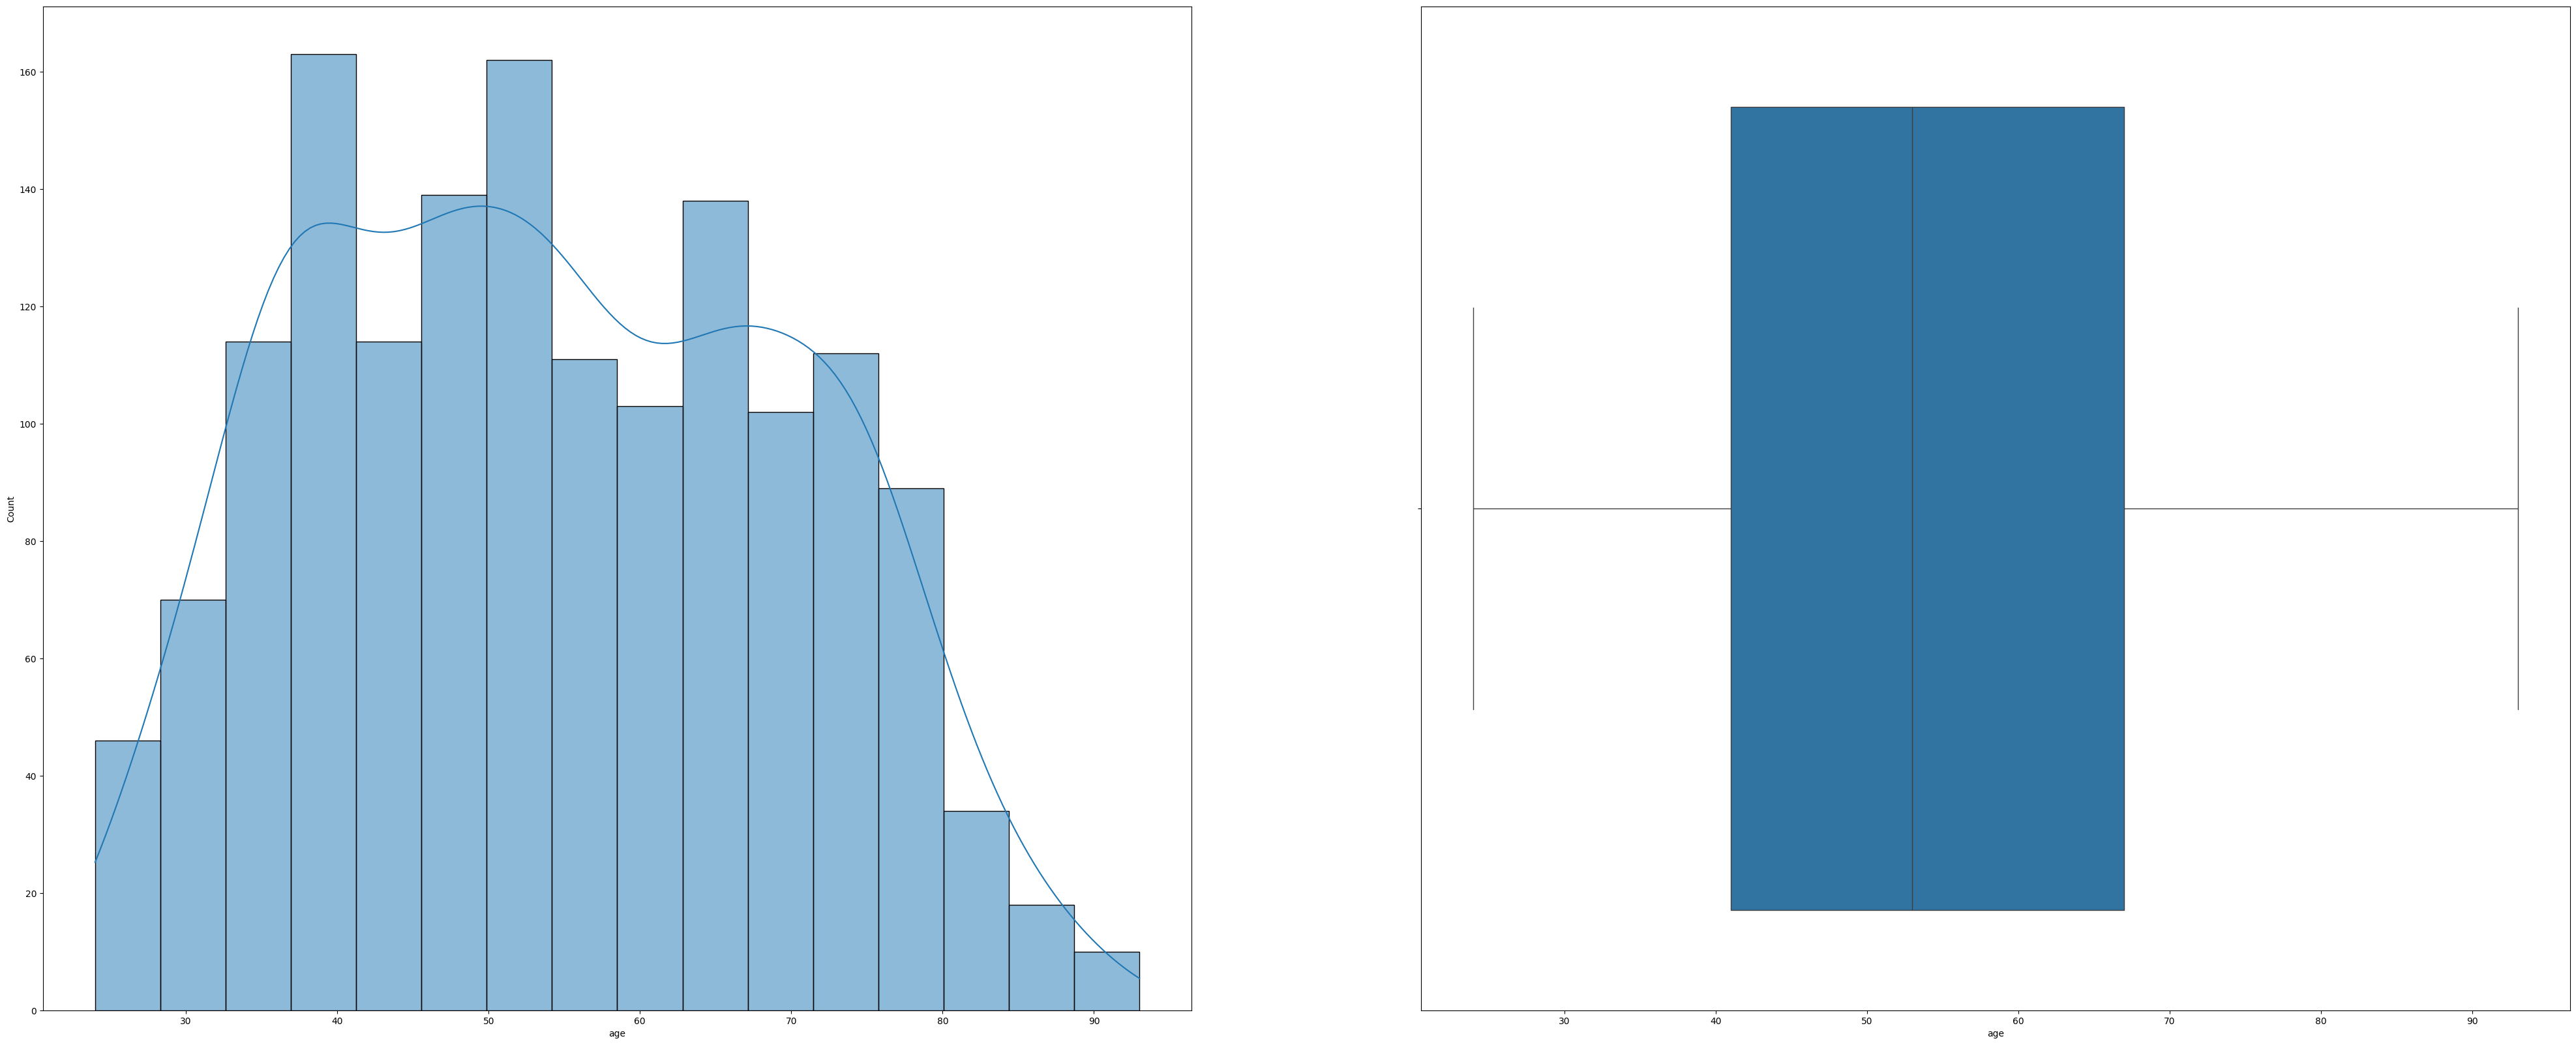

In [122]:
uni_plot(df,"age")

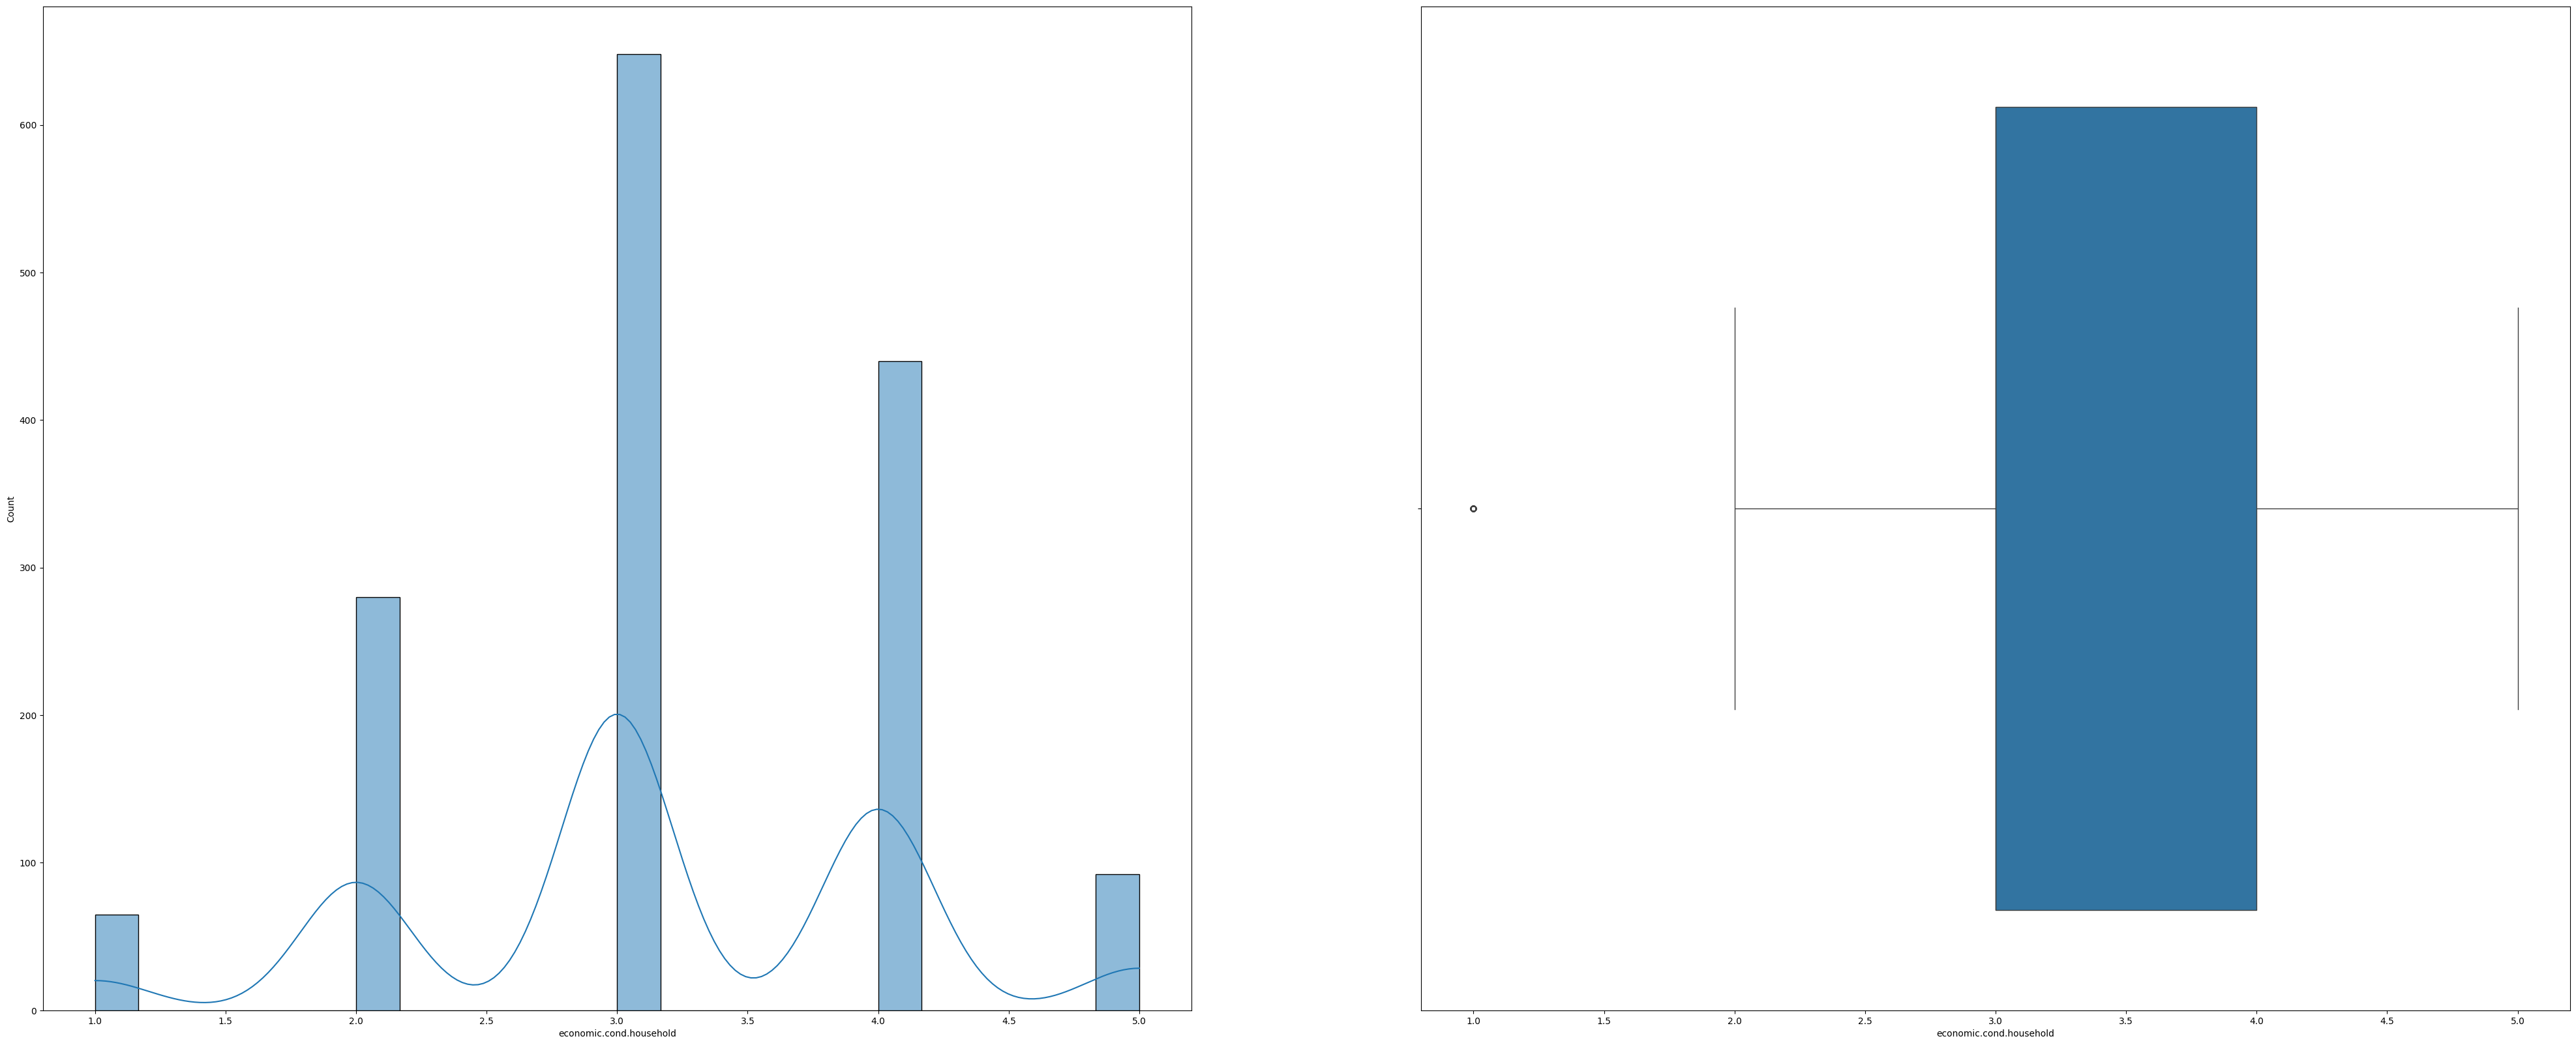

In [123]:
uni_plot(df,"economic.cond.household")

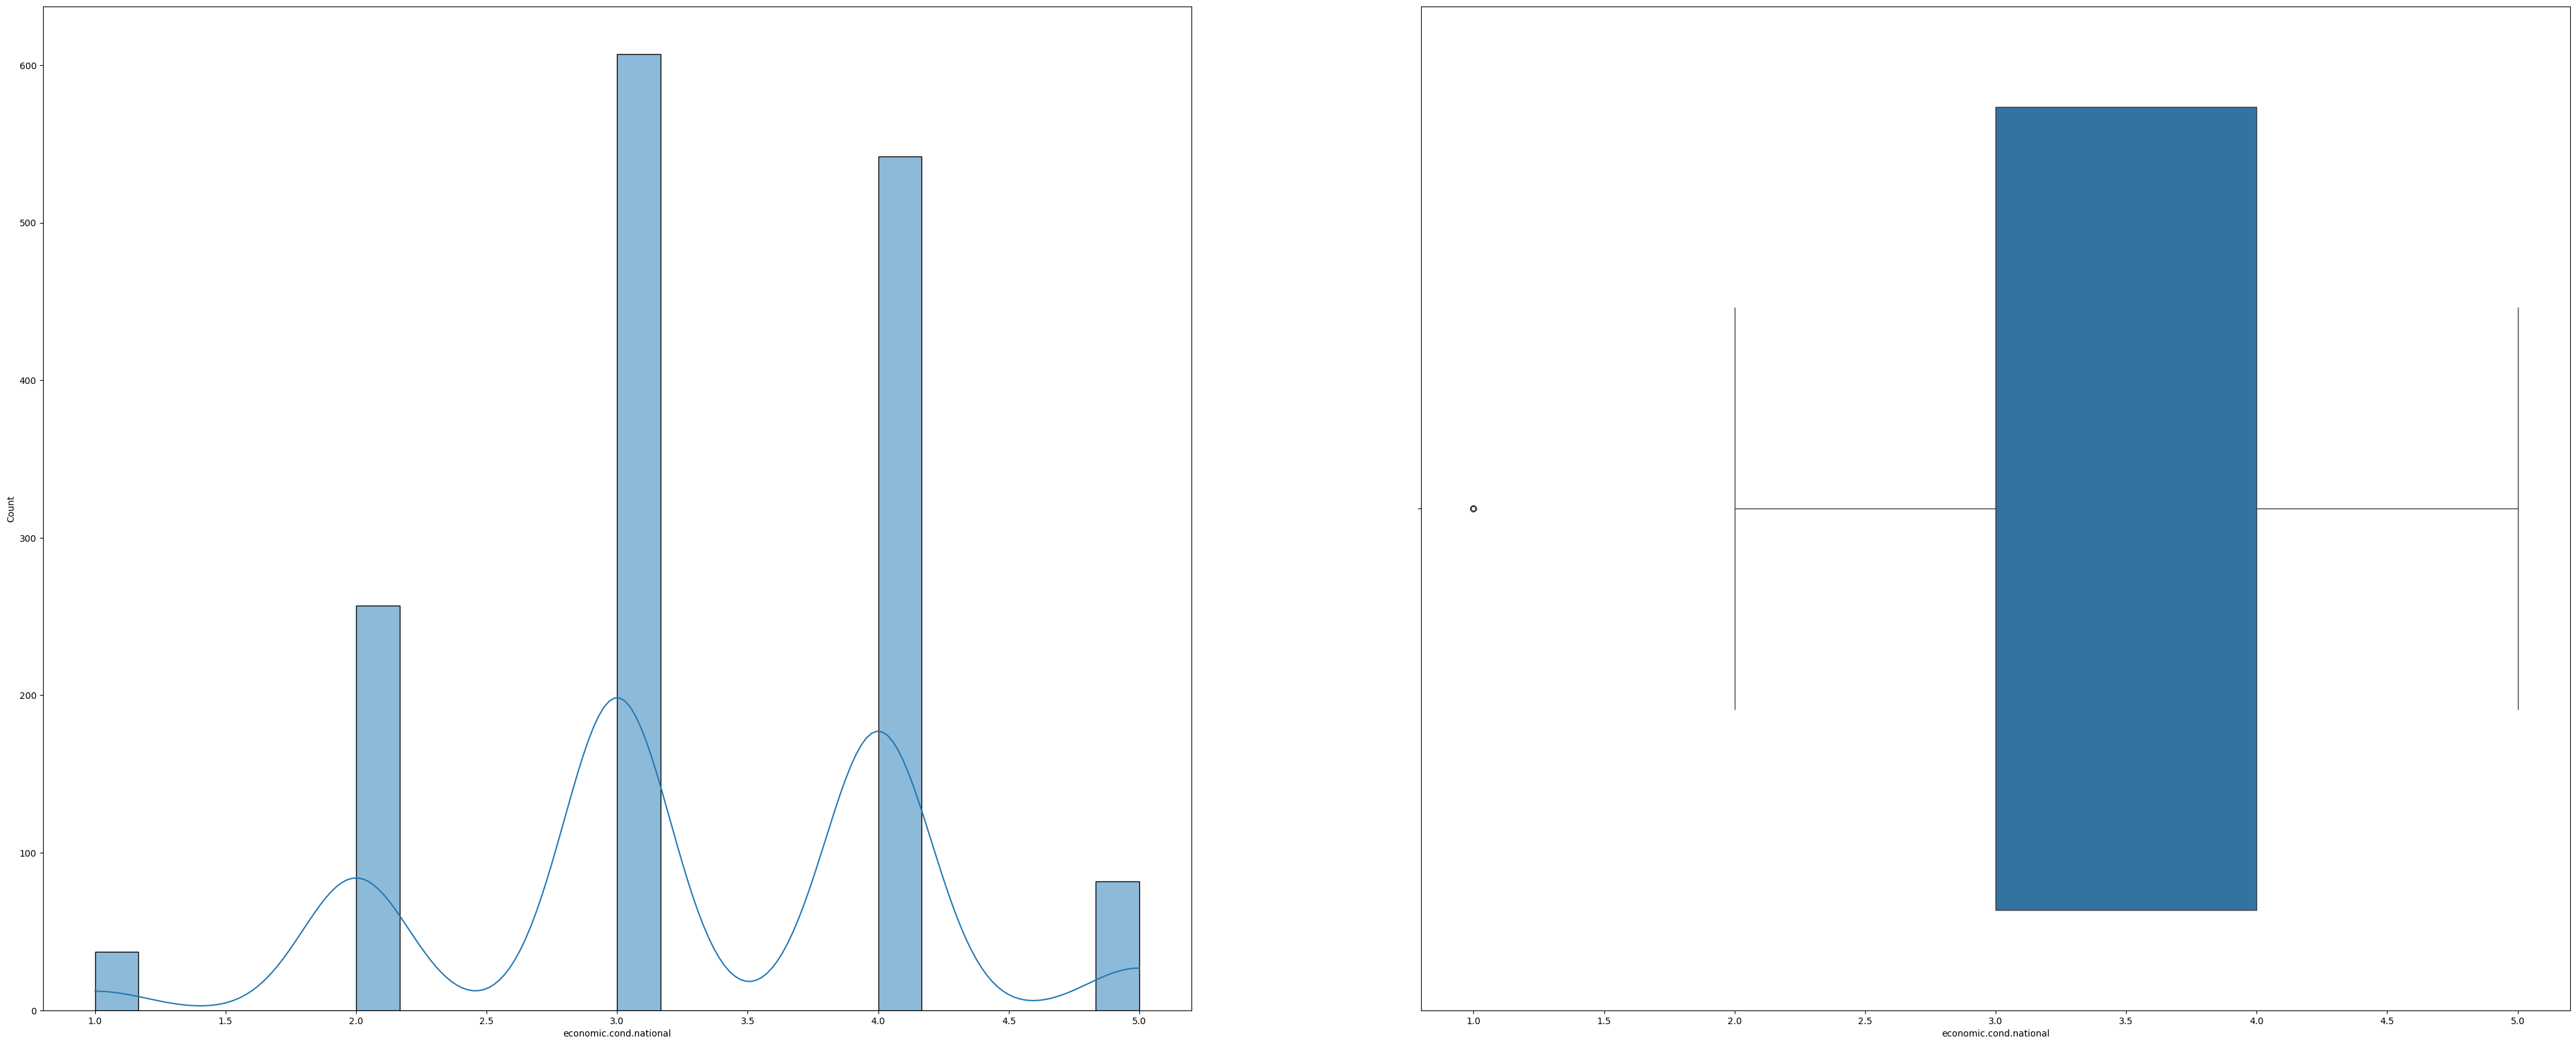

In [124]:
uni_plot(df,"economic.cond.national")

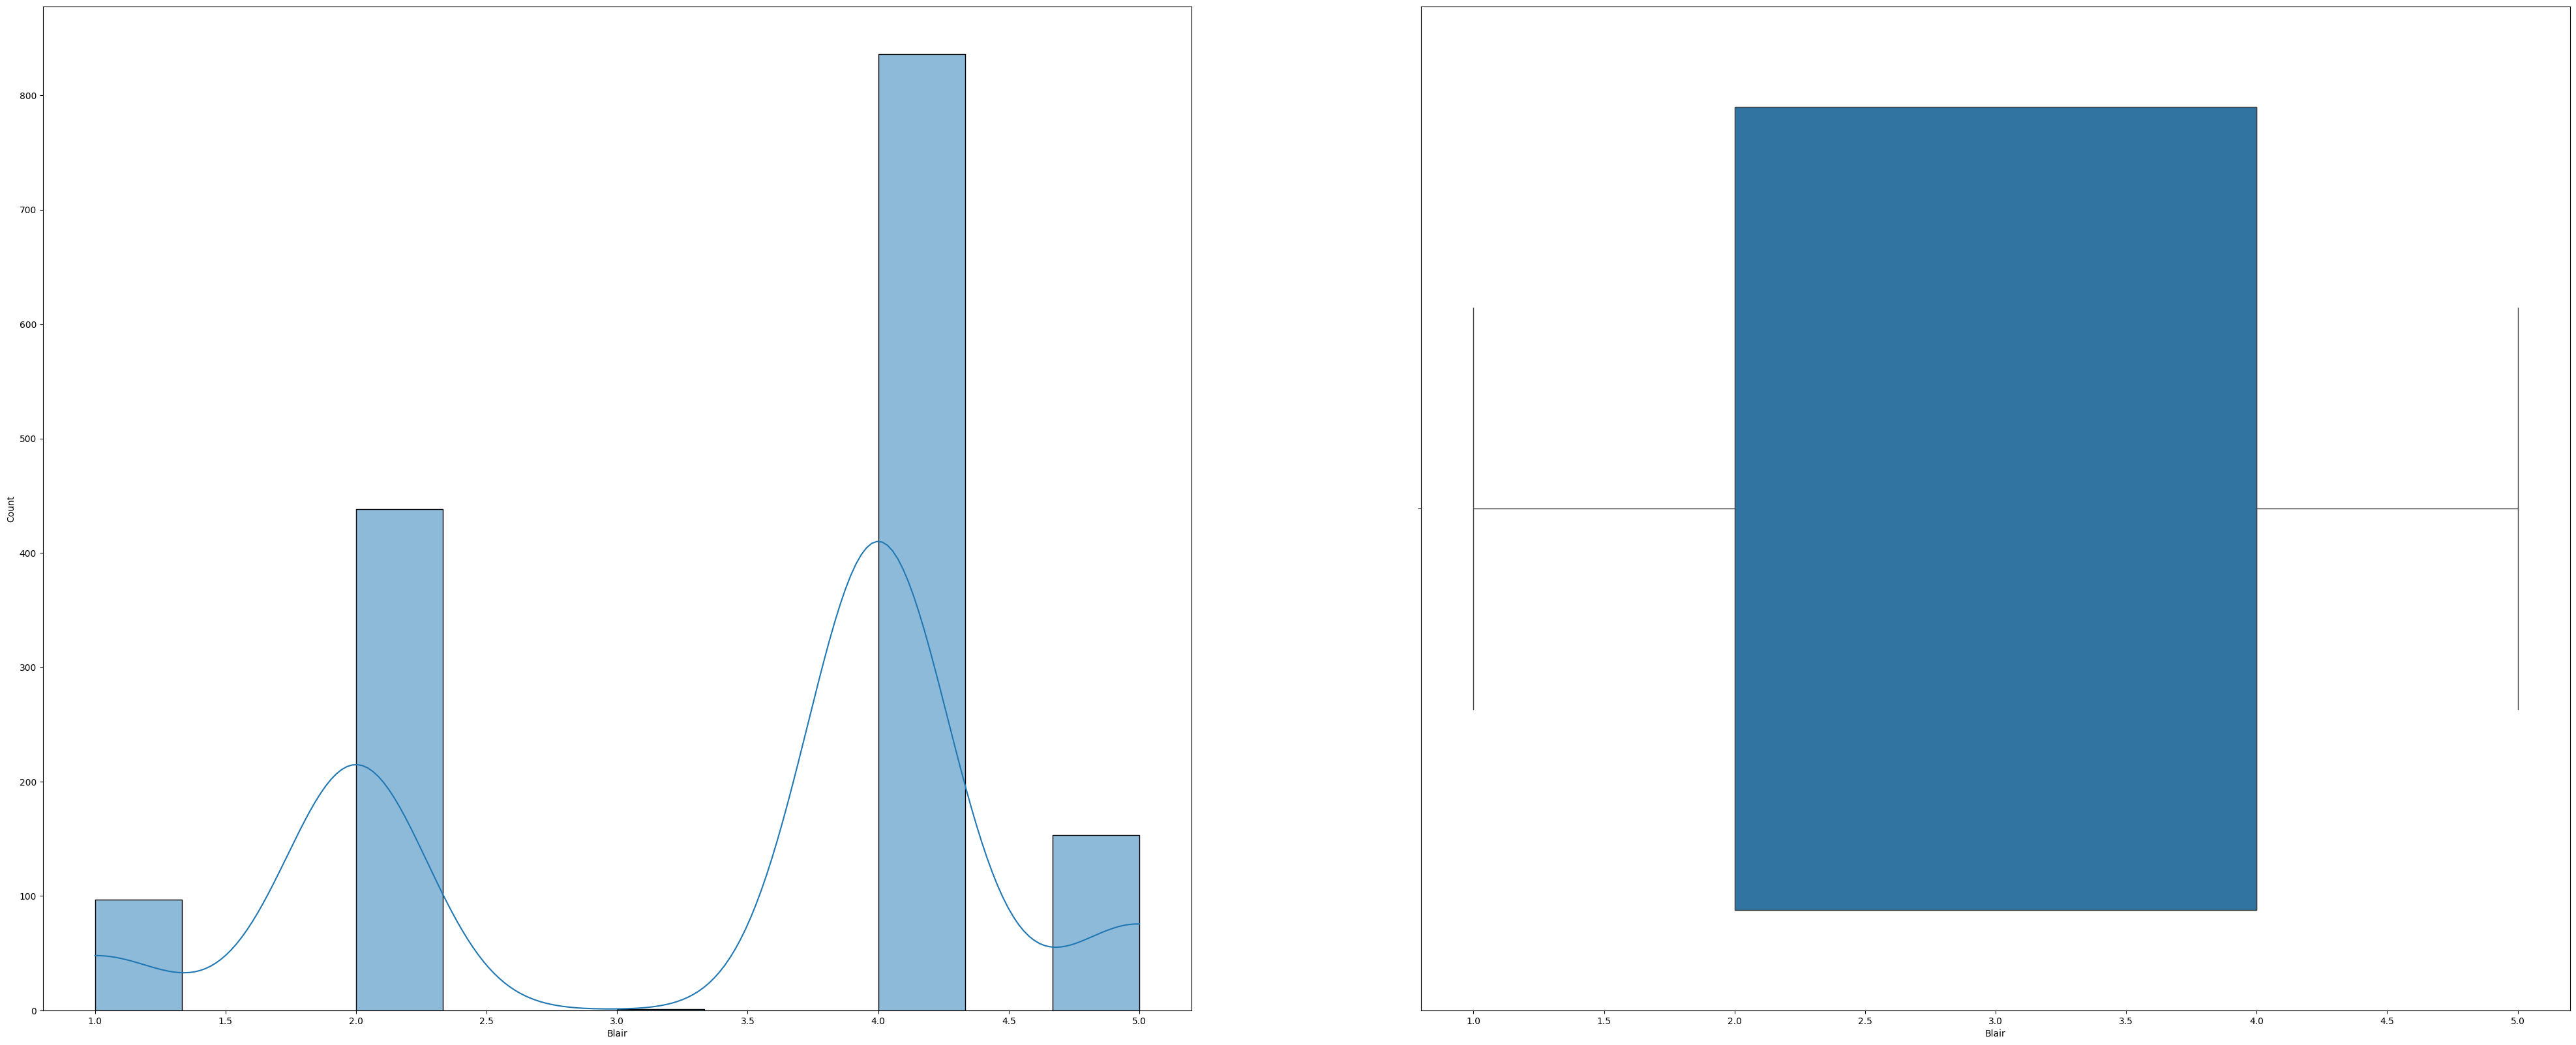

In [125]:
uni_plot(df,"Blair")

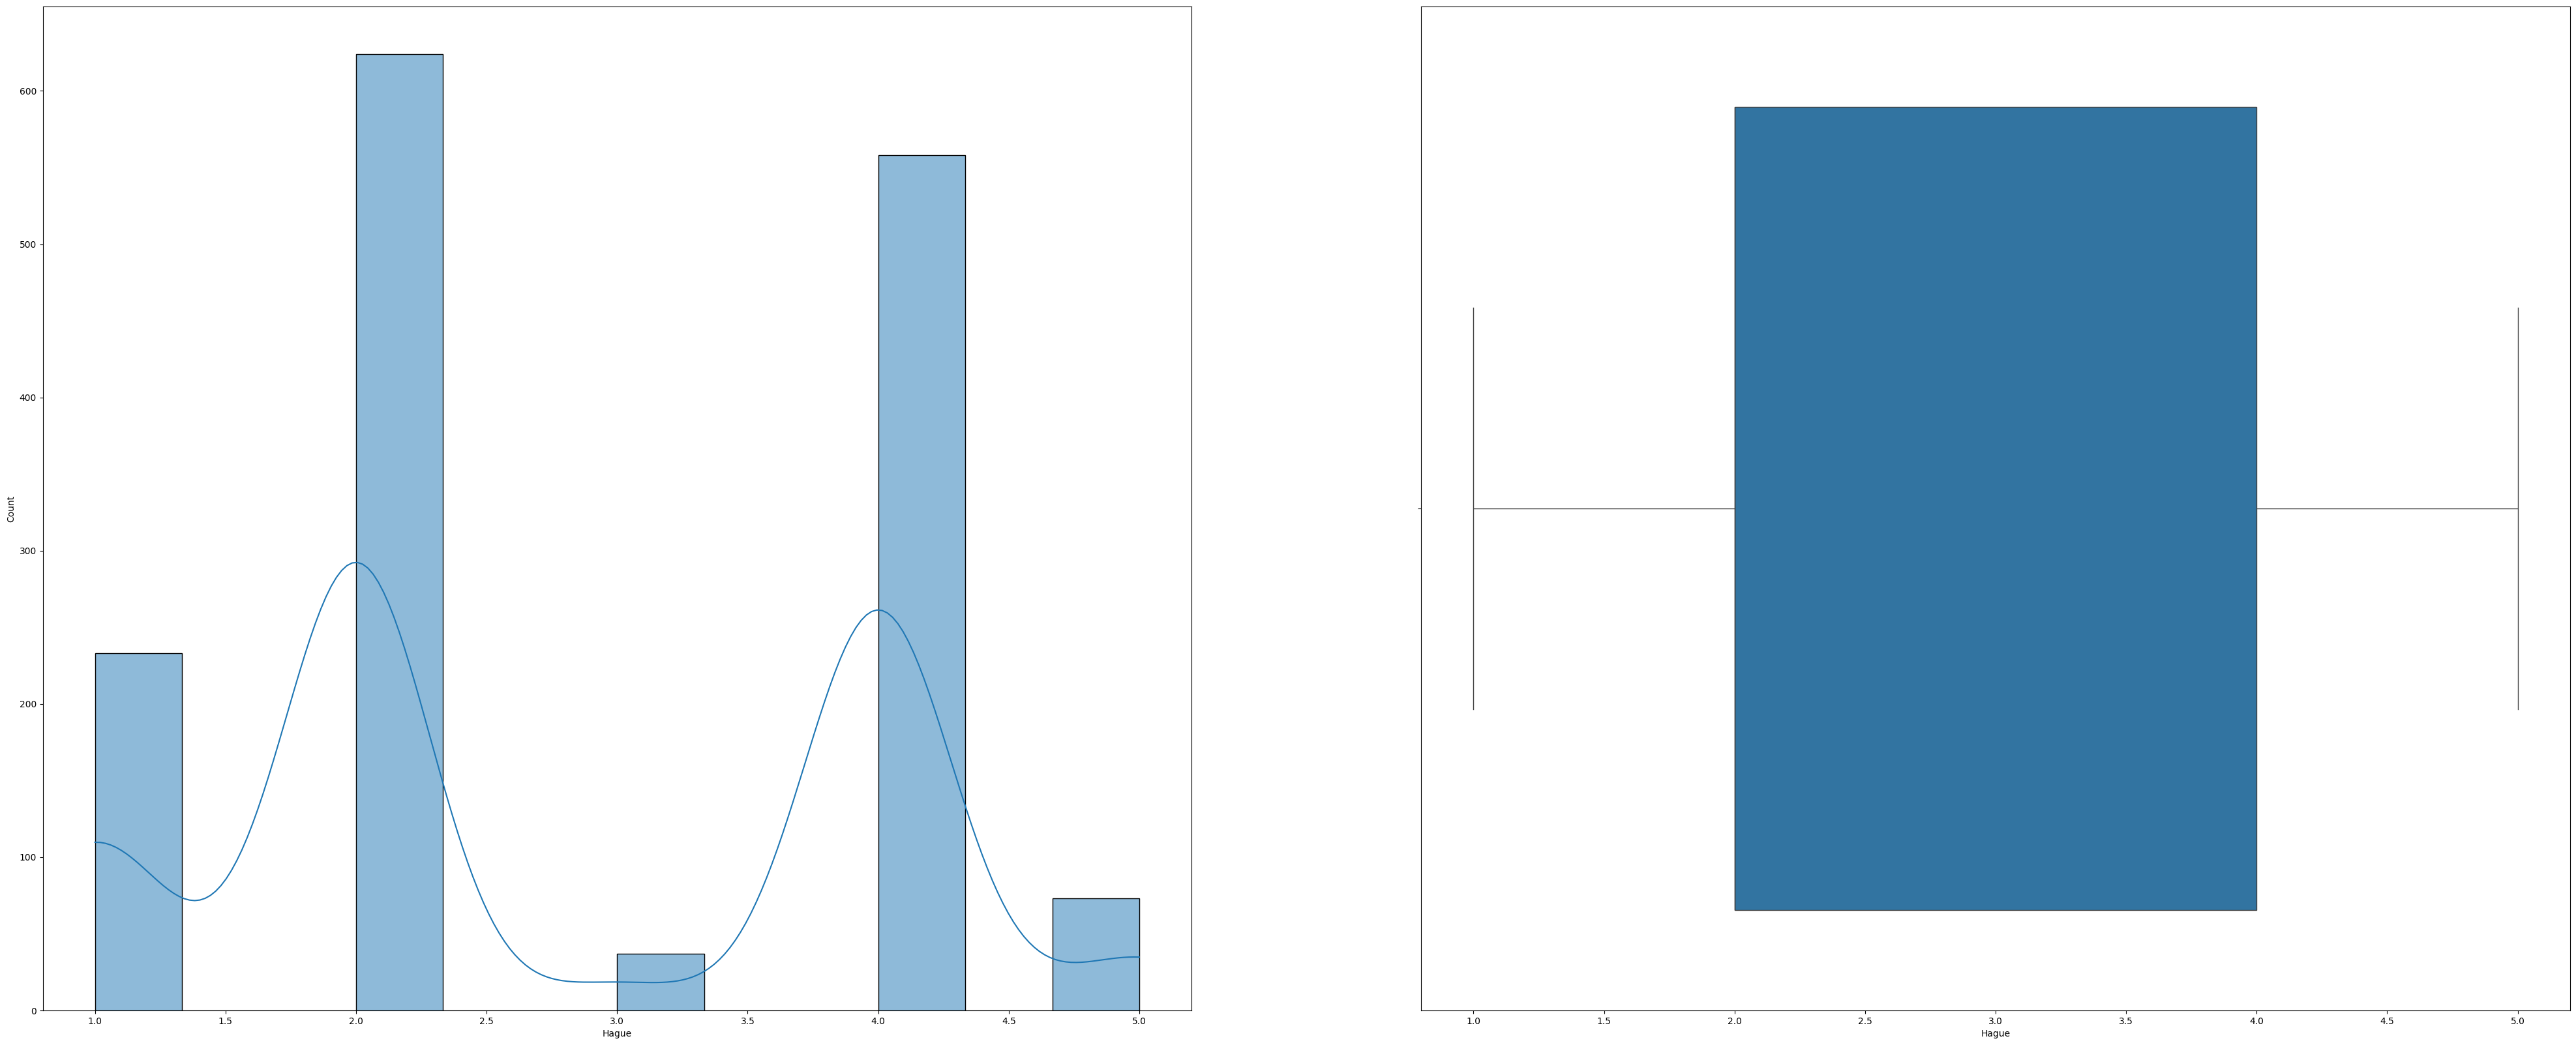

In [126]:
uni_plot(df,"Hague")

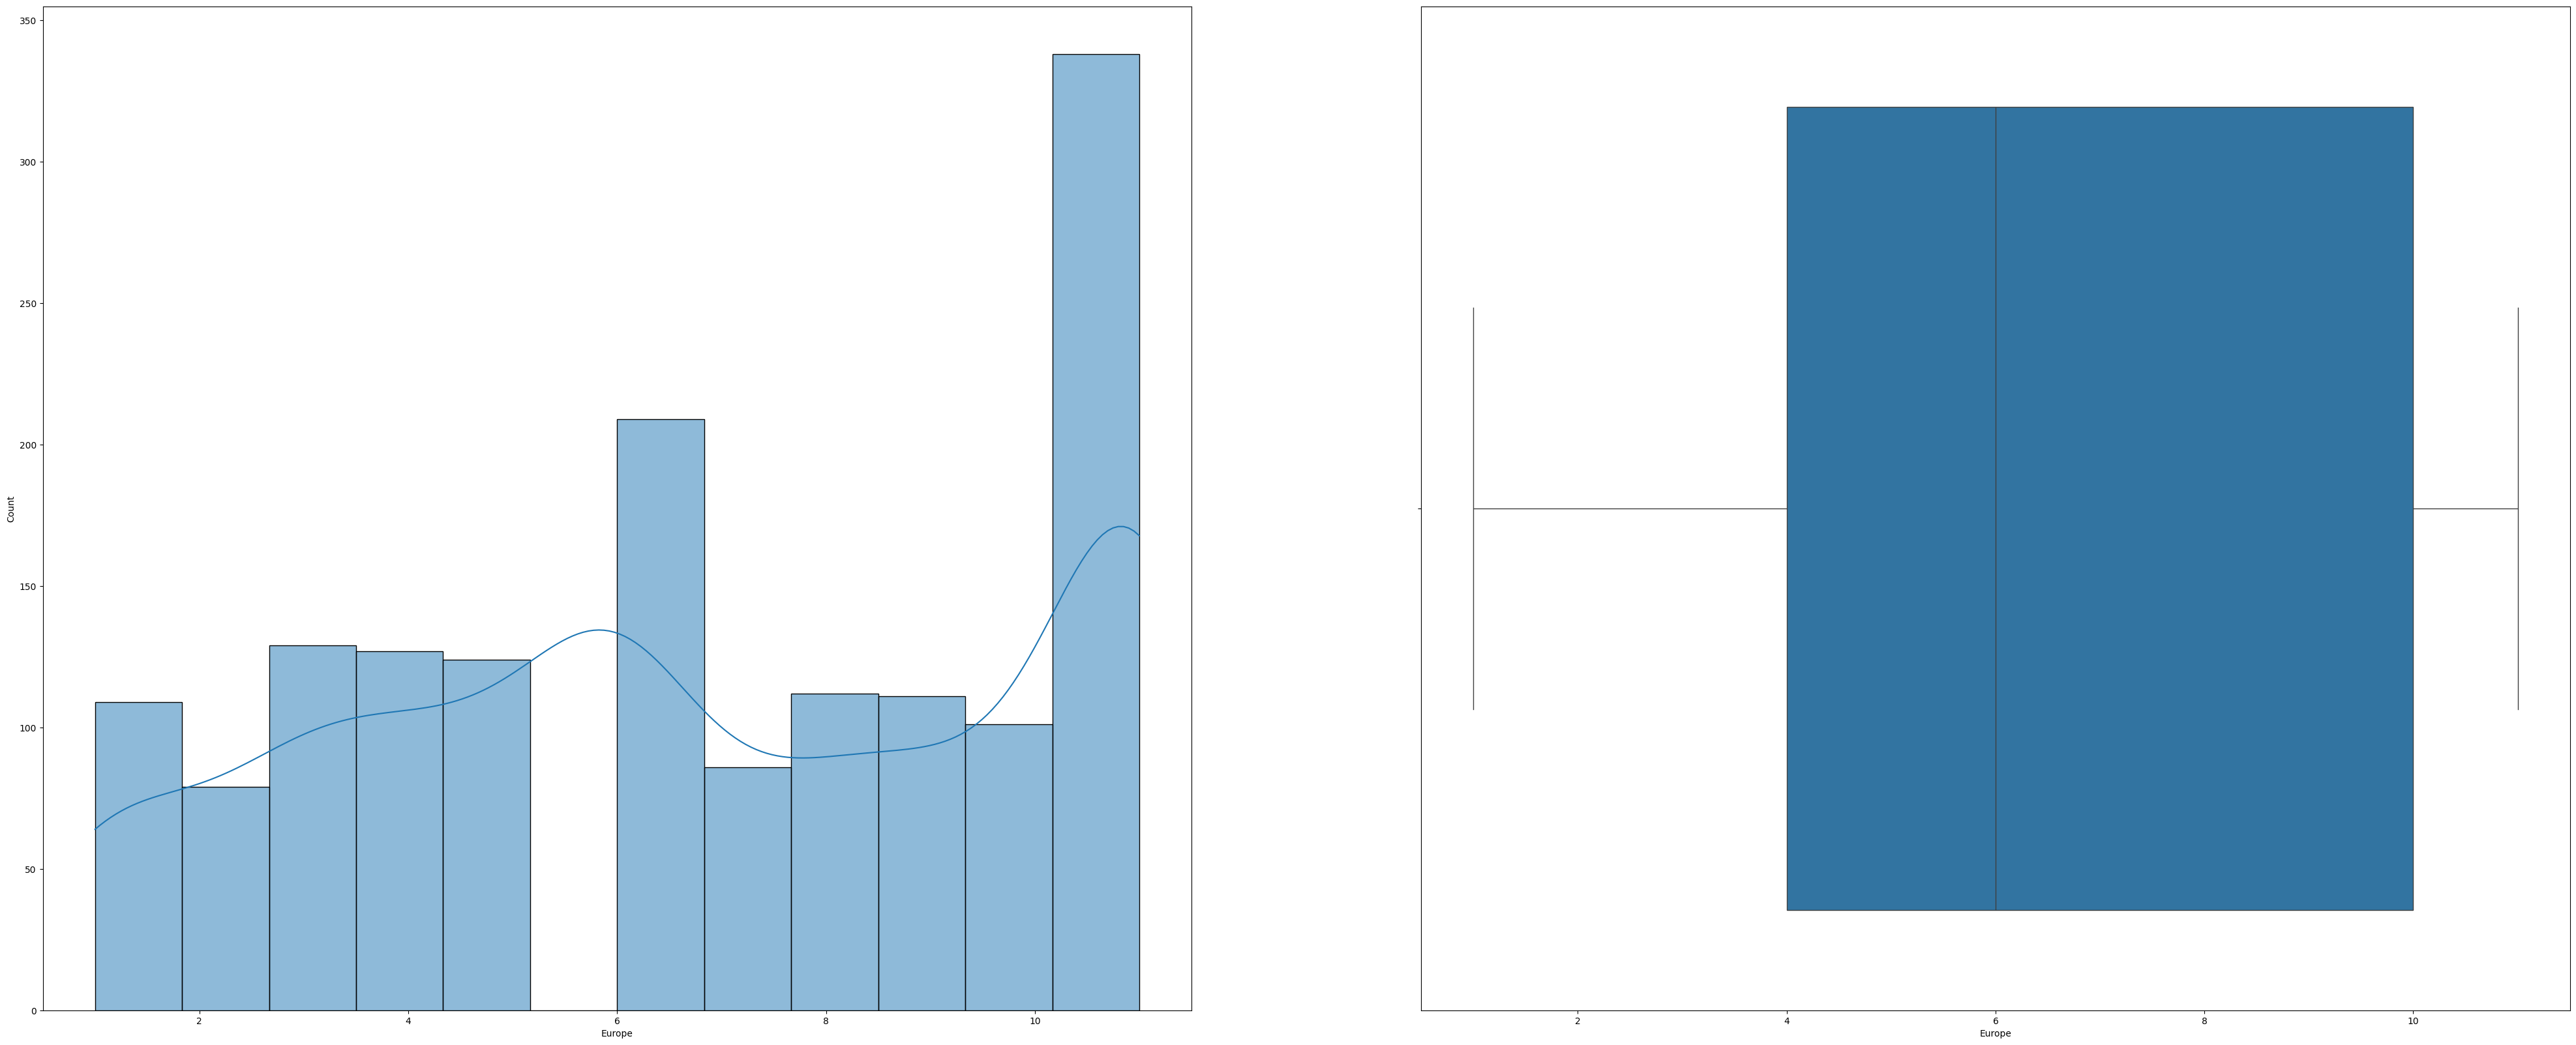

In [127]:
uni_plot(df,"Europe")

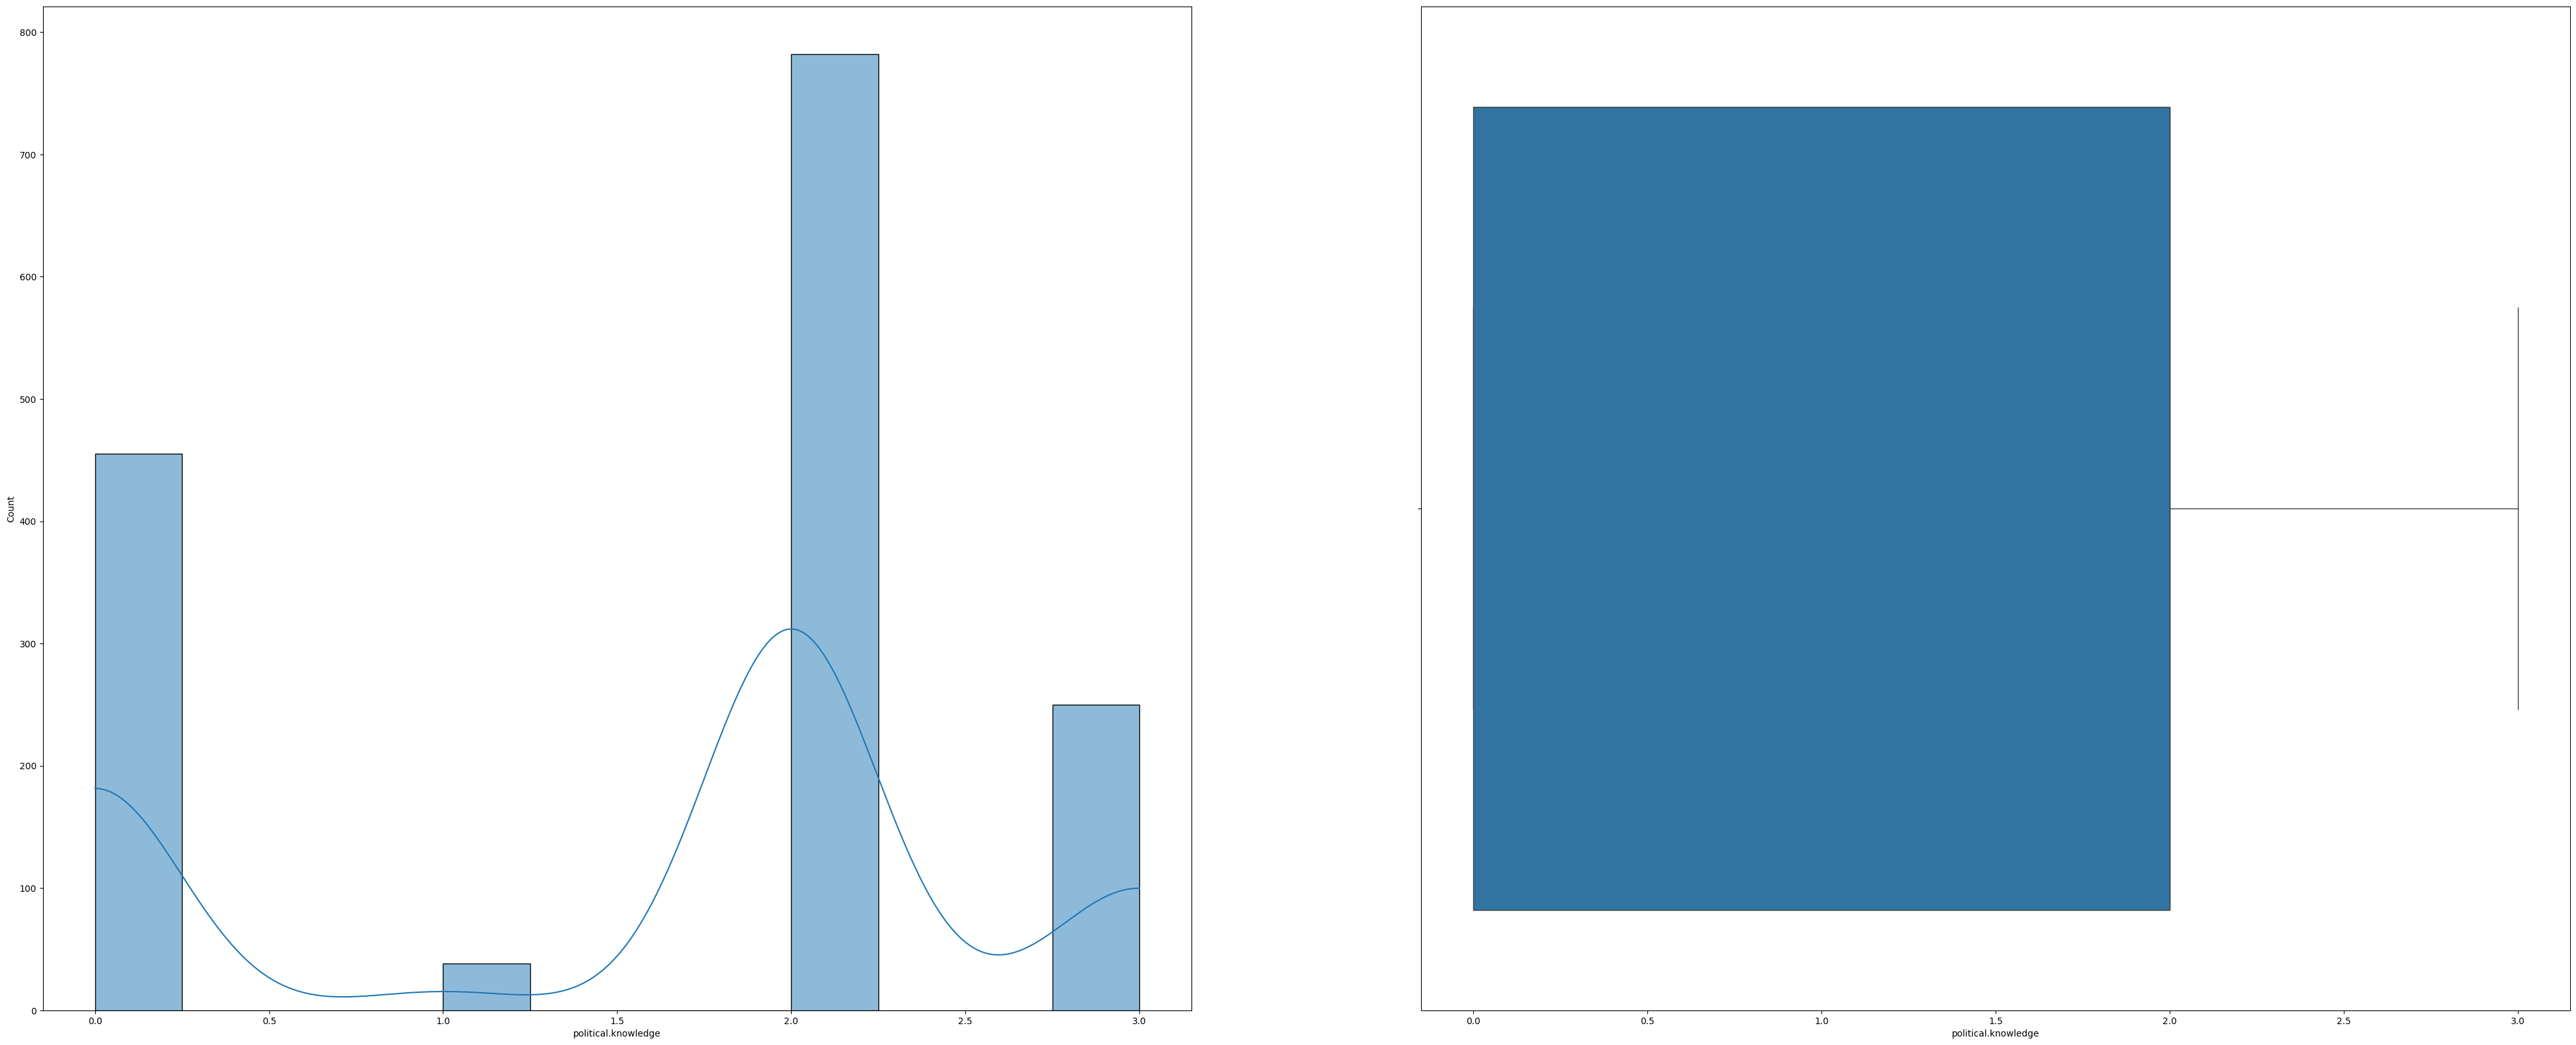

In [128]:
uni_plot(df,"political.knowledge")

Multi variate Analysis

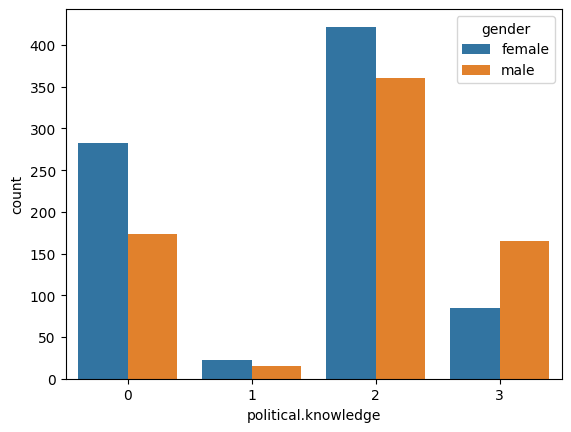

In [129]:
sns.countplot(data=df,x='political.knowledge',hue='gender')
plt.show()

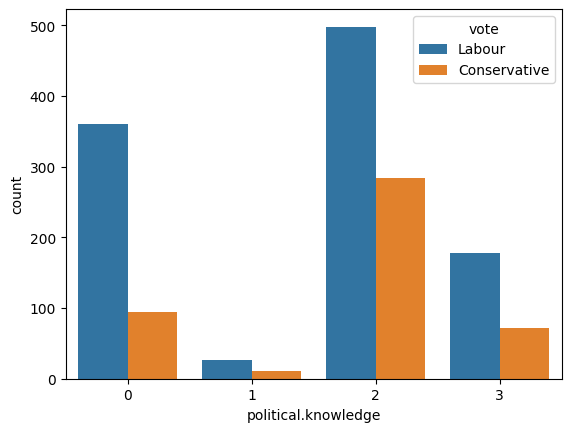

In [130]:
sns.countplot(data=df,hue='vote',x='political.knowledge')
plt.show()

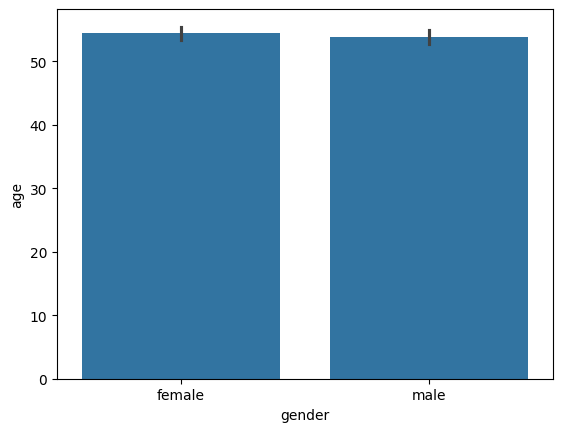

In [131]:
sns.barplot(data=df,x='gender',y='age')
plt.show()

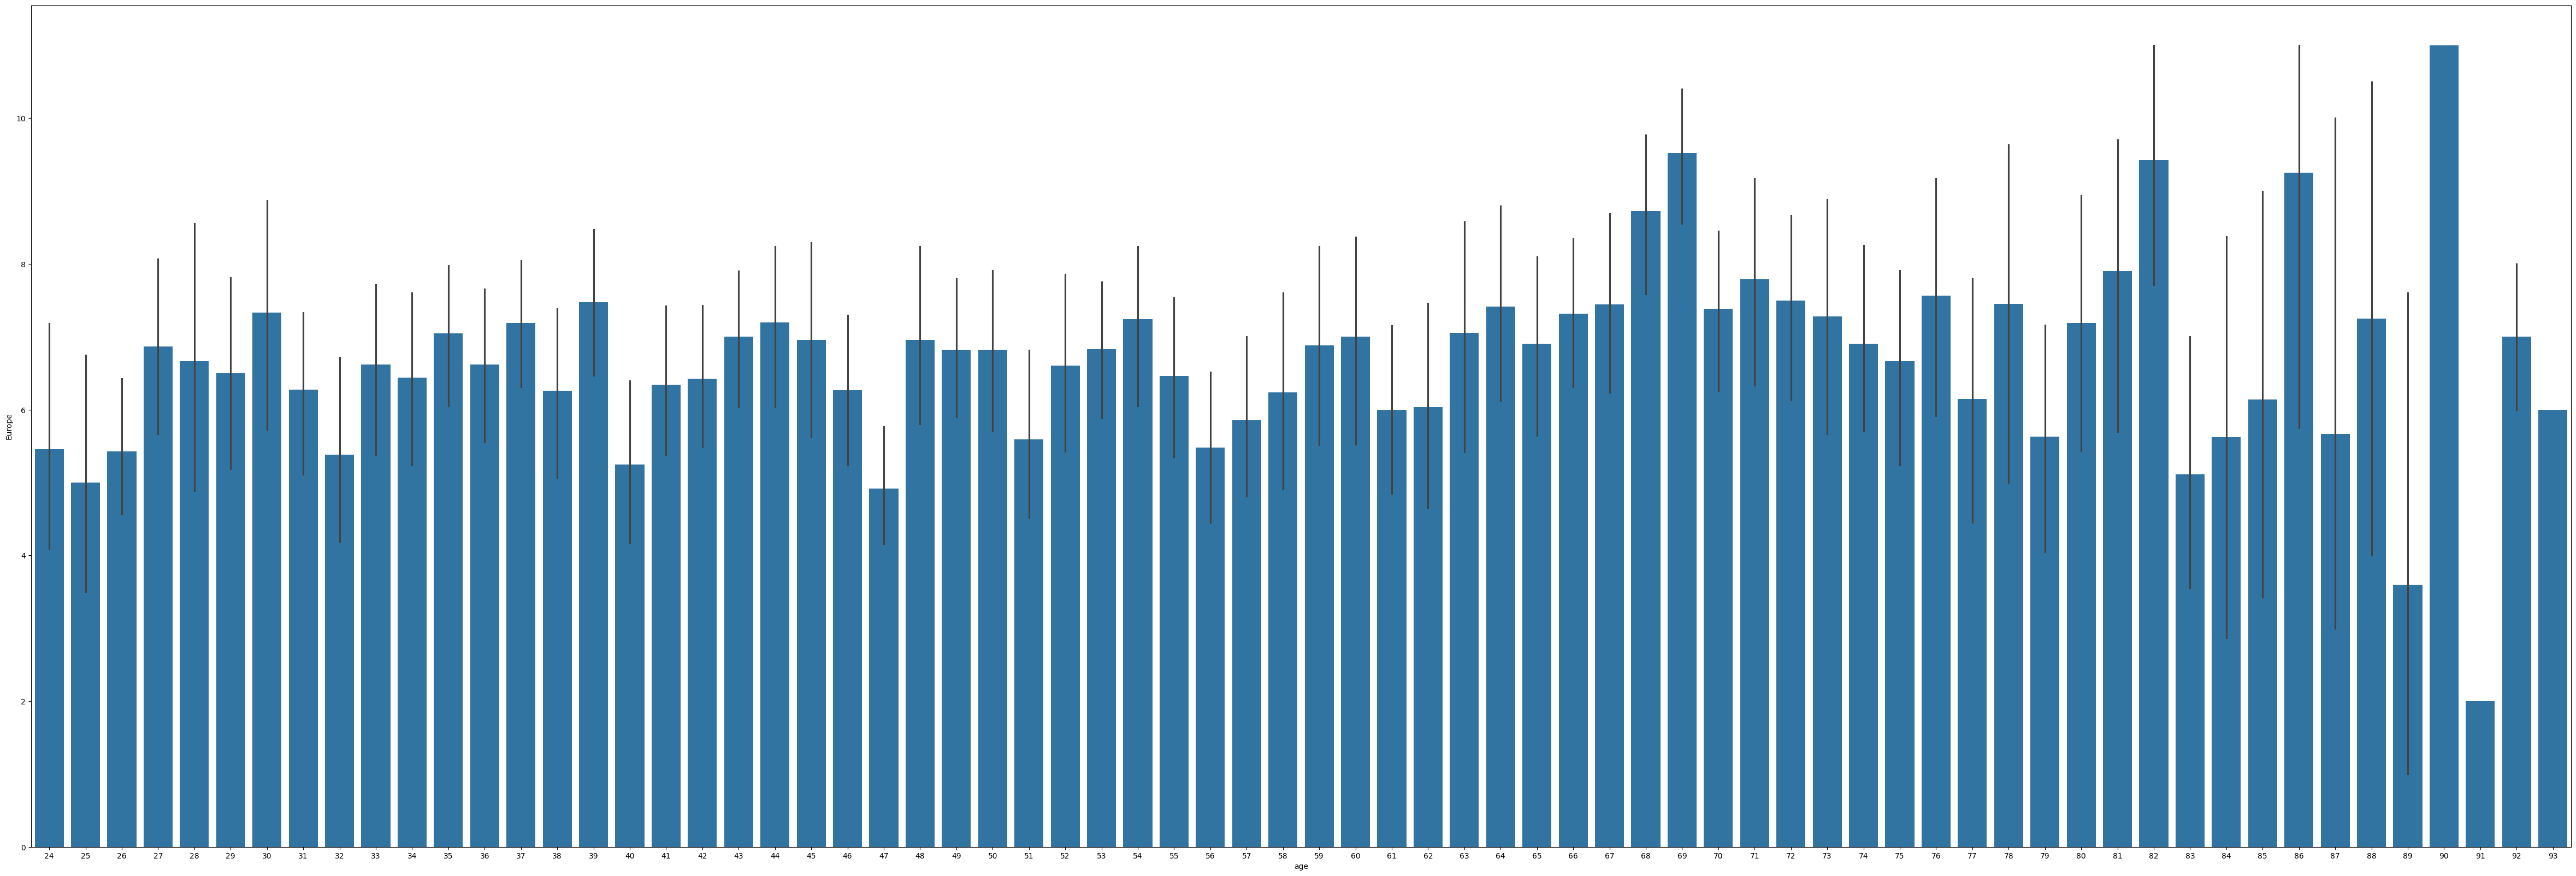

In [132]:
plt.figure(figsize=(60,20))
sns.barplot(data=df,x='age',y='Europe')
plt.show()

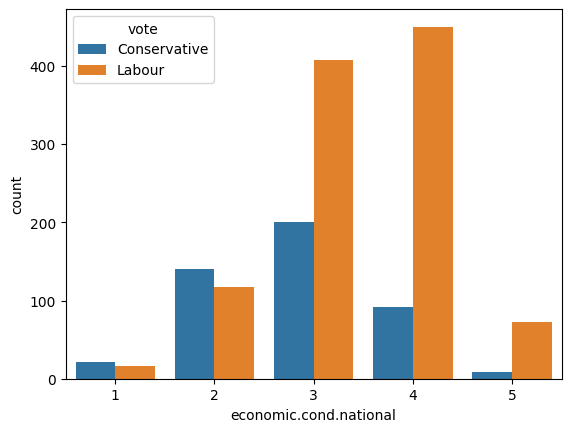

In [133]:
sns.countplot(data=df,hue='vote',x='economic.cond.national')
plt.show()

People who feel satisifed with nation's economy have voted for labour in higher percent

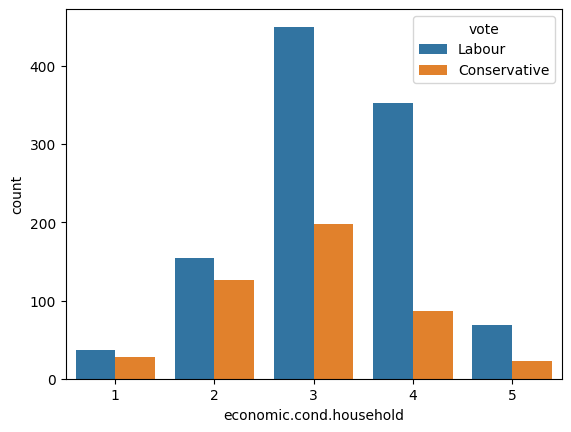

In [134]:
sns.countplot(data=df,hue='vote',x='economic.cond.household')
plt.show()

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [136]:
df_age1=df[(df['age']>=23) & (df['age']<41)]
df_age1

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
8,Labour,39,3,3,4,4,11,0,female
10,Labour,39,3,3,1,2,7,0,female
...,...,...,...,...,...,...,...,...,...
1493,Labour,34,3,1,4,2,6,2,female
1502,Labour,31,4,3,4,4,5,3,female
1516,Labour,30,3,4,4,2,4,2,male
1519,Conservative,35,3,4,4,2,8,2,male


In [137]:
df_age2=df[(df['age']>=41) & (df['age']<53)]
df_age2

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
4,Labour,41,2,2,1,1,6,2,male
5,Labour,47,3,4,4,4,4,2,male
15,Labour,51,4,4,4,4,5,0,male
16,Labour,43,2,4,1,4,8,0,female
...,...,...,...,...,...,...,...,...,...
1496,Labour,41,4,5,5,4,5,2,female
1501,Conservative,44,3,1,4,2,9,3,female
1507,Conservative,52,2,1,1,4,8,2,female
1513,Labour,46,3,3,4,2,4,2,male


In [138]:
df_age3=df[(df['age']>=53) & (df['age']<67)]
df_age3

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
6,Labour,57,2,2,4,4,11,2,male
11,Labour,66,4,3,4,4,9,2,male
12,Labour,59,4,4,4,1,10,2,female
13,Labour,66,3,3,2,5,8,0,female
21,Labour,53,2,1,2,4,5,2,male
...,...,...,...,...,...,...,...,...,...
1503,Conservative,54,5,2,4,2,6,2,female
1504,Labour,63,3,2,4,1,3,3,male
1506,Labour,62,3,3,4,1,6,2,male
1511,Labour,63,3,3,4,2,8,2,female


In [139]:
df_age4=df[(df['age']>67)]
df_age4

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
7,Labour,77,3,4,4,1,1,0,male
9,Labour,70,3,2,5,1,11,2,male
14,Labour,77,2,3,2,1,11,2,female
18,Labour,79,3,3,4,2,1,0,male
34,Conservative,76,3,4,4,4,3,2,female
...,...,...,...,...,...,...,...,...,...
1514,Labour,74,3,3,5,2,11,0,female
1515,Conservative,82,2,2,2,1,11,2,female
1517,Labour,76,4,3,2,2,11,2,male
1521,Conservative,73,2,2,4,4,8,2,male


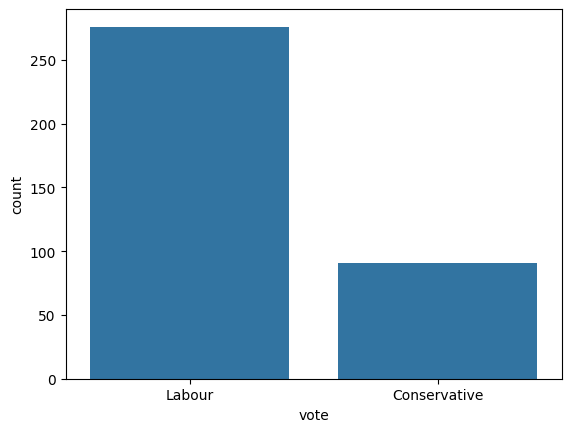

In [140]:
sns.countplot(data=df_age1,x='vote')
plt.show()

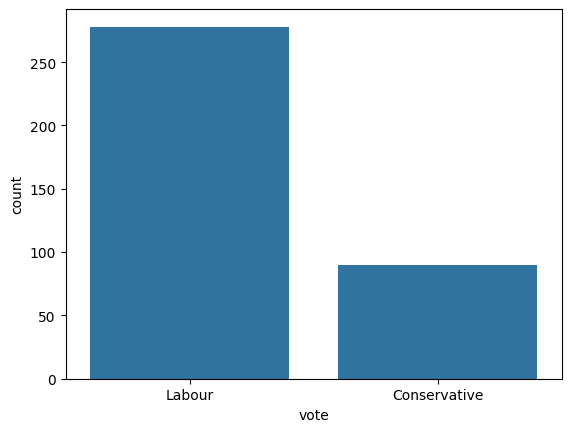

In [141]:
sns.countplot(data=df_age2,x='vote')
plt.show()

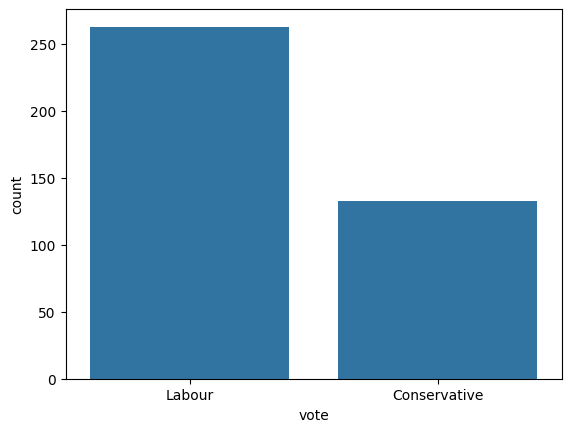

In [142]:
sns.countplot(data=df_age3,x='vote')
plt.show()

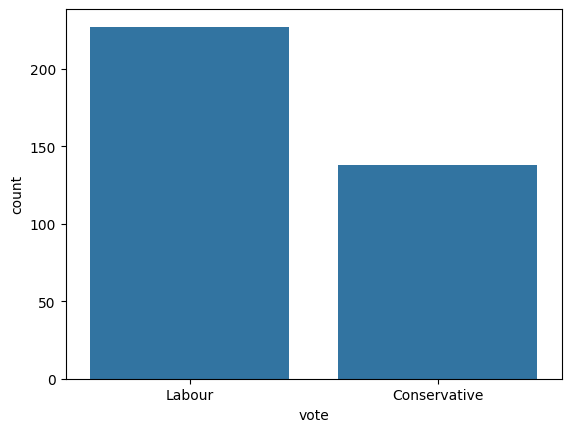

In [143]:
sns.countplot(data=df_age4,x='vote')
plt.show()

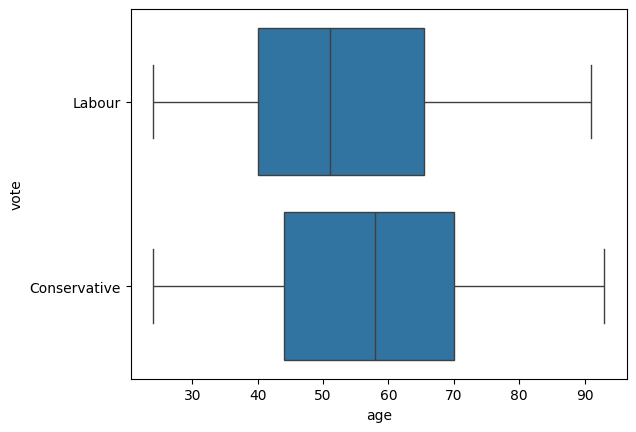

In [144]:
sns.boxplot(data=df,x='age',y='vote')
plt.show()

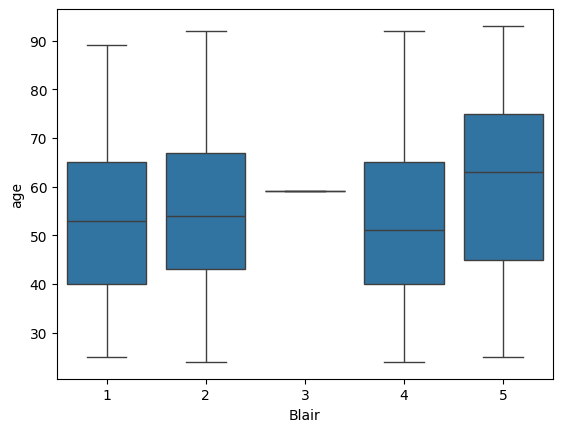

In [145]:
sns.boxplot(data=df,x="Blair",y="age")
plt.show()

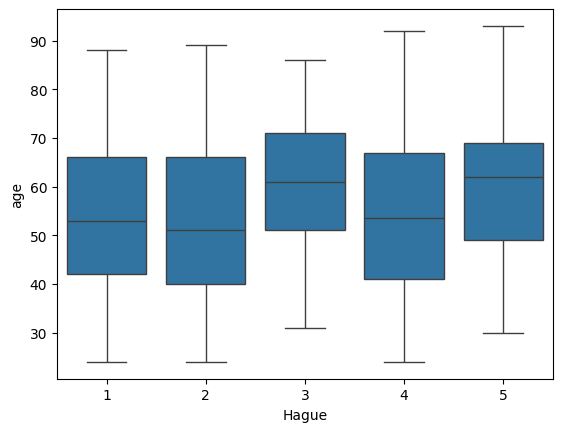

In [146]:
sns.boxplot(data=df,x="Hague",y="age")
plt.show()

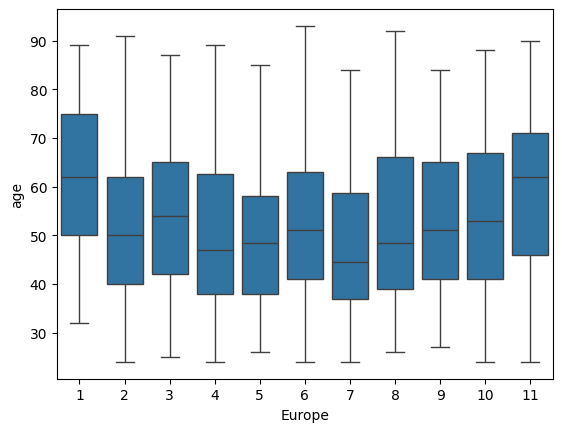

In [147]:
sns.boxplot(data=df,x="Europe",y="age")
plt.show()

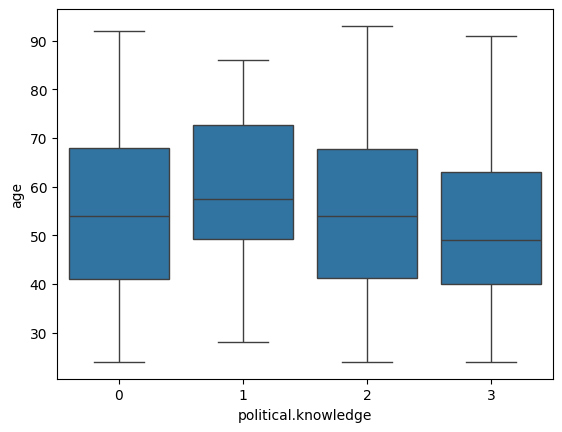

In [148]:
sns.boxplot(data=df,x="political.knowledge",y="age")
plt.show()

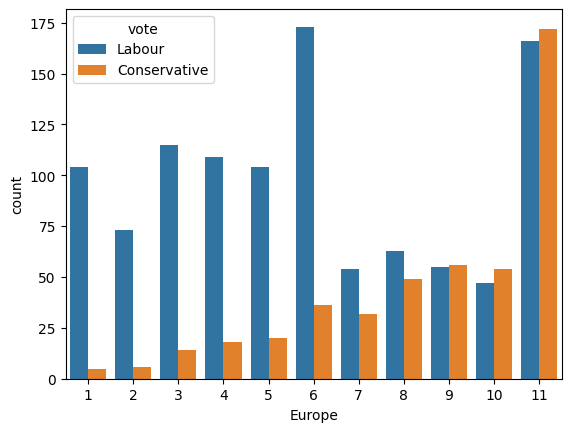

In [149]:
sns.countplot(data=df,x="Europe",hue="vote")
plt.show()

People who support for integrating europe has voted for conservative and people who dont want to integrate have voted for labour

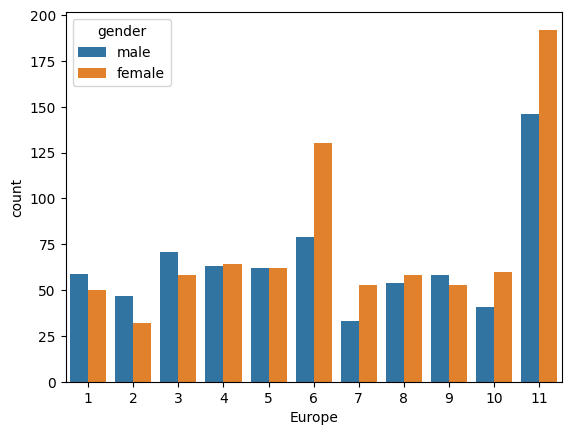

In [150]:
sns.countplot(data=df,x="Europe",hue="gender")
plt.show()

% of Female population is higher than male who strongly support integration 

% of Male population is higher than female who are rejecting integration

Note: Try to use single line in doc for the above inference

<Axes: xlabel='economic.cond.national'>

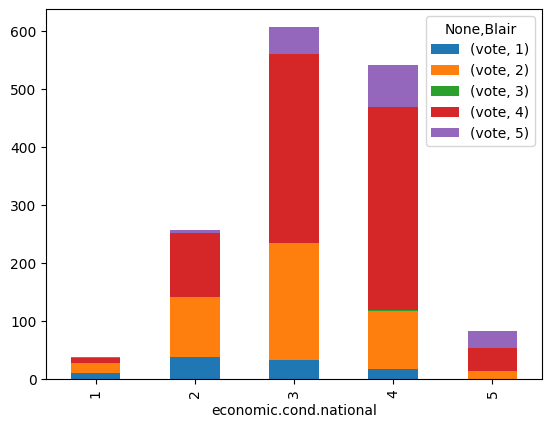

In [151]:
pl1=df.groupby(['Blair','economic.cond.national'])['vote'].count().reset_index()
pl1_piv=pl1.pivot(columns='Blair',index="economic.cond.national")
pl1_piv.plot(kind='bar',stacked=True)

<Axes: xlabel='economic.cond.household'>

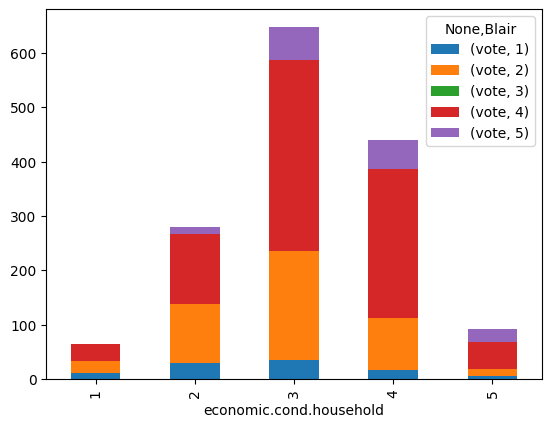

In [152]:
pl2=df.groupby(['Blair','economic.cond.household'])['vote'].count().reset_index()
pl2_piv=pl2.pivot(columns='Blair',index="economic.cond.household")
pl2_piv.plot(kind='bar',stacked=True)

<Axes: xlabel='Europe'>

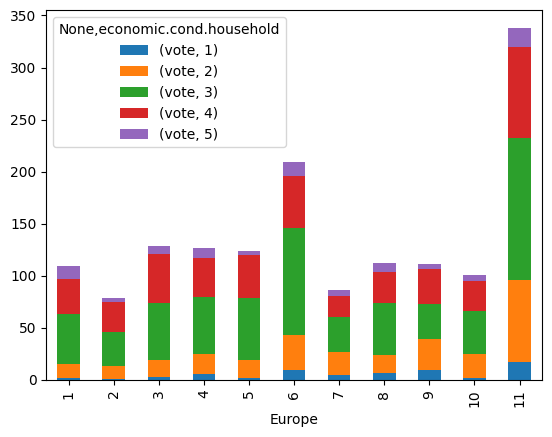

In [153]:
pl3=df.groupby(['Europe','economic.cond.household'])['vote'].count().reset_index()
pl3_piv=pl3.pivot(index='Europe',columns="economic.cond.household")
pl3_piv.plot(kind='bar',stacked=True)

<Axes: xlabel='Europe'>

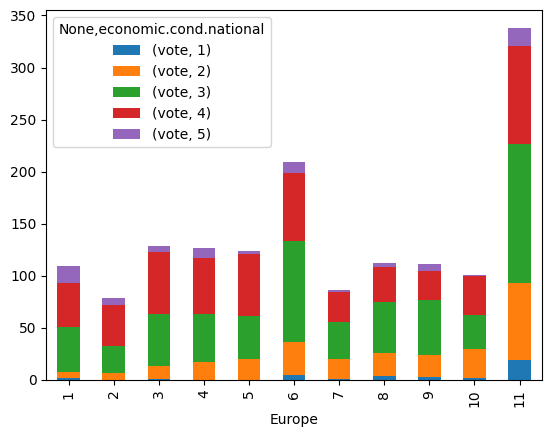

In [154]:
pl4=df.groupby(['Europe','economic.cond.national'])['vote'].count().reset_index()
pl4_piv=pl4.pivot(index='Europe',columns="economic.cond.national")
pl4_piv.plot(kind='bar',stacked=True)

<Axes: xlabel='Europe'>

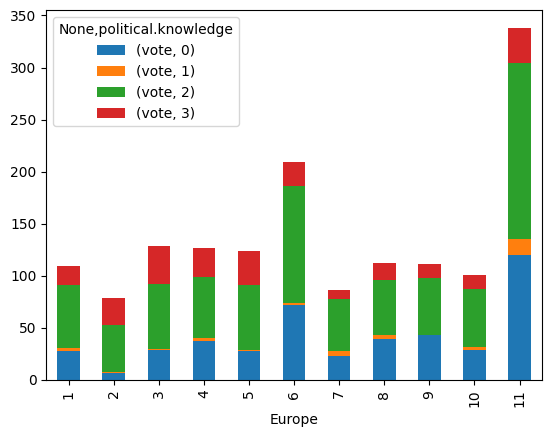

In [155]:
pl5=df.groupby(['Europe','political.knowledge'])['vote'].count().reset_index()
pl5_piv=pl5.pivot(index='Europe',columns="political.knowledge")
pl5_piv.plot(kind='bar',stacked=True)

<Axes: xlabel='economic.cond.national'>

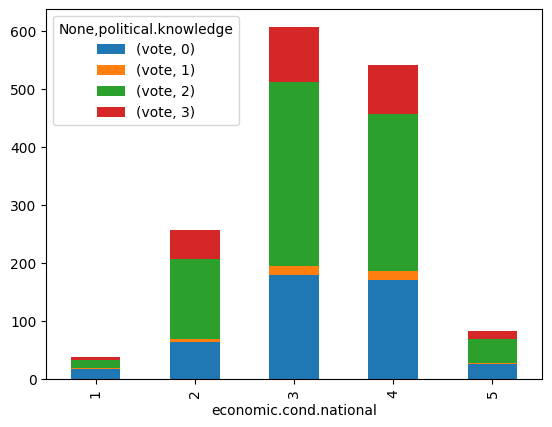

In [156]:
pl6=df.groupby(['economic.cond.national','political.knowledge'])['vote'].count().reset_index()
pl6_piv=pl6.pivot(index='economic.cond.national',columns="political.knowledge")
pl6_piv.plot(kind='bar',stacked=True)

<Axes: xlabel='Hague'>

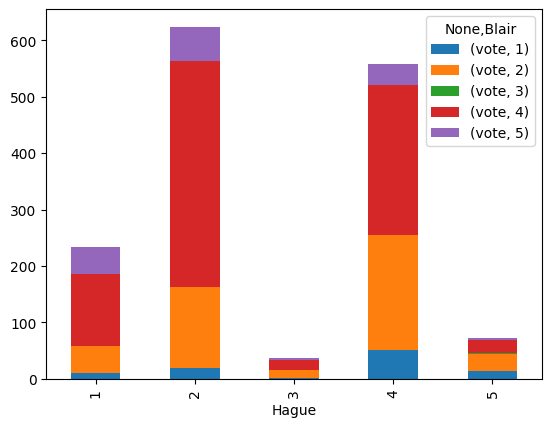

In [157]:
pl7=df.groupby(['Blair','Hague'])['vote'].count().reset_index()
pl7_piv=pl7.pivot(columns='Blair',index="Hague")
pl7_piv.plot(kind='bar',stacked=True)

In [158]:
#sns.heatmap(df.corr(),annot=True)
#plt.show()

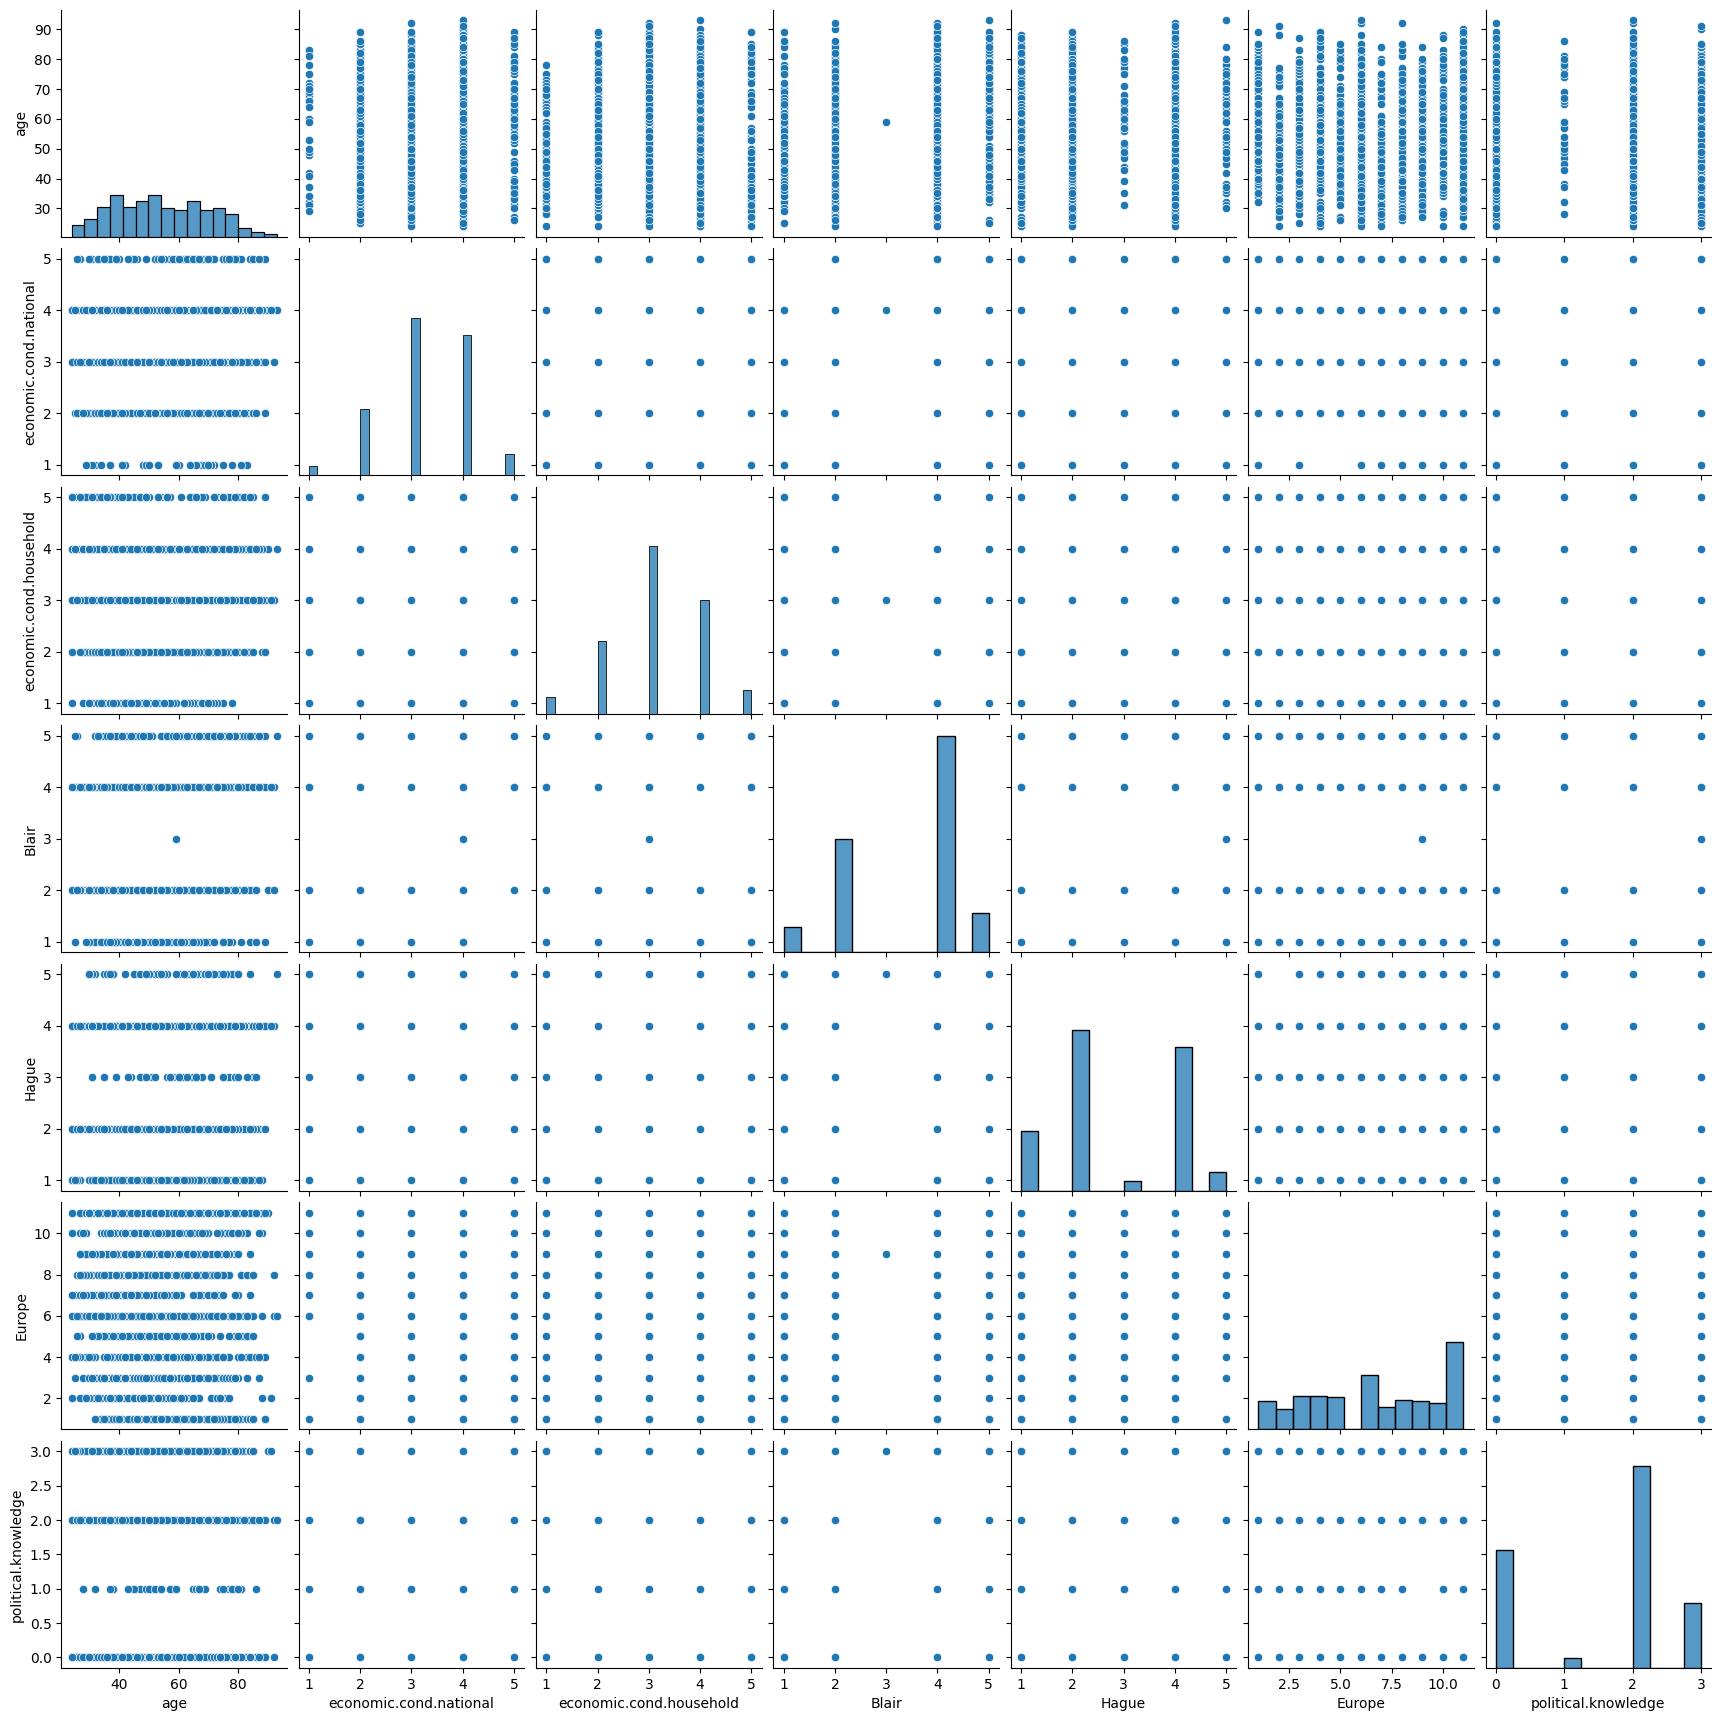

In [159]:
sns.pairplot(data=df)
plt.show()

In [160]:
# Q2

In [161]:
df.loc[df['gender']=='male','gender']=1
df.loc[df['gender']=='female','gender']=0
df.loc[df['vote']=='Labour','vote']=1
df.loc[df['vote']=='Conservative','vote']=0
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [162]:
numcols=list(df.columns)
numcols.remove('vote')
numcols.remove('gender')
numcols

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scaler = MinMaxScaler()

In [165]:
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8
0,1.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,1.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,1.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,1.0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,1.0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0
...,...,...,...,...,...,...,...,...,...
1520,0.0,0.623188,1.00,0.50,0.25,0.75,1.0,1.000000,1.0
1521,0.0,0.710145,0.25,0.25,0.75,0.75,0.7,0.666667,1.0
1522,1.0,0.188406,0.50,0.50,1.00,0.75,0.1,0.666667,1.0
1523,0.0,0.536232,0.50,0.50,0.00,0.75,1.0,0.666667,1.0


In [166]:
col=list(df.columns)
df_scaled.columns=col
df_scaled

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,1.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,1.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,1.0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,1.0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0
...,...,...,...,...,...,...,...,...,...
1520,0.0,0.623188,1.00,0.50,0.25,0.75,1.0,1.000000,1.0
1521,0.0,0.710145,0.25,0.25,0.75,0.75,0.7,0.666667,1.0
1522,1.0,0.188406,0.50,0.50,1.00,0.75,0.1,0.666667,1.0
1523,0.0,0.536232,0.50,0.50,0.00,0.75,1.0,0.666667,1.0


In [167]:
x=df_scaled.drop('vote',axis=1)
y=df_scaled['vote']

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [170]:
# Q3

In [171]:
from sklearn import tree

In [172]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay
)

In [173]:
dt1= tree.DecisionTreeClassifier()
dt1.fit(x_train, y_train)

DecisionTreeClassifier()

In [174]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [175]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [176]:
print(dt1.score(x_train,y_train))


0.9990627928772259


In [177]:
print(dt1.score(x_test,y_test))

0.75764192139738


Train Data performance:
   Accuracy    Recall  Precision        F1
0  0.999063  0.998639        1.0  0.999319


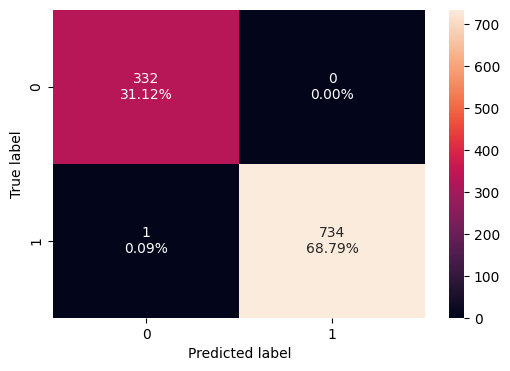

In [178]:
confusion_matrix_statsmodels(
    dt1, x_train, y_train, threshold=0.5
)

dt1_model_train_perf_threshold_main1 = model_performance_classification_statsmodels(
    dt1, x_train, y_train, threshold=0.5
)
print("Train Data performance:")
print(dt1_model_train_perf_threshold_main1)
print("=====================================================")

Test Data performance:
   Accuracy    Recall  Precision        F1
0  0.757642  0.814024   0.842271  0.827907


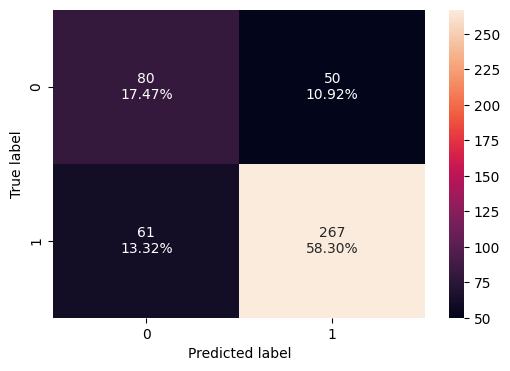

In [179]:
confusion_matrix_statsmodels(
    dt1, x_test, y_test, threshold=0.5
)

dt1_model_test_perf_threshold_main1 = model_performance_classification_statsmodels(
    dt1, x_test, y_test, threshold=0.5
)
print("Test Data performance:")
print(dt1_model_test_perf_threshold_main1)
print("=====================================================")

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rf1=RandomForestClassifier(random_state=1)
rf1.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [182]:
rf1.score(x_train,y_train)

0.9990627928772259

In [183]:
y_pred_rf1_train=rf1.predict(x_train)

print( confusion_matrix(y_train, y_pred_rf1_train))
print( classification_report(y_train, y_pred_rf1_train))

[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       332
         1.0       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [184]:
y_pred_rf1=rf1.predict(x_test)


In [185]:
print(rf1.score(x_test,y_test))

0.8209606986899564


Train Data performance:
   Accuracy  Recall  Precision       F1
0  0.999063     1.0   0.998641  0.99932


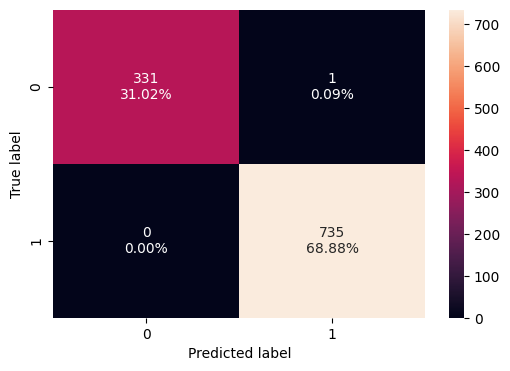

In [186]:
confusion_matrix_statsmodels(
    rf1, x_train, y_train, threshold=0.5
)

rf1_model_train_perf_threshold_main1 = model_performance_classification_statsmodels(
    rf1, x_train, y_train, threshold=0.5
)
print("Train Data performance:")
print(rf1_model_train_perf_threshold_main1)
print("=====================================================")

Test Data performance:
   Accuracy    Recall  Precision        F1
0  0.820961  0.871951   0.877301  0.874618


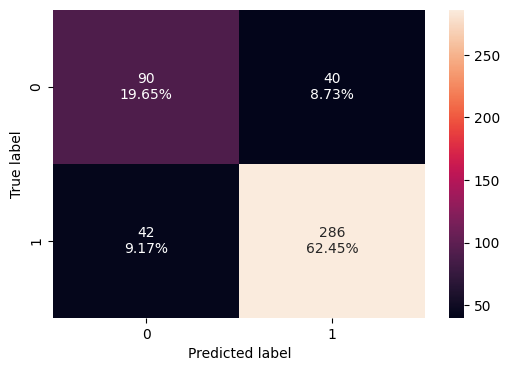

In [187]:
confusion_matrix_statsmodels(
    rf1, x_test, y_test, threshold=0.5
)

rf1_model_test_perf_threshold_main1 = model_performance_classification_statsmodels(
    rf1, x_test, y_test, threshold=0.5
)
print("Test Data performance:")
print(rf1_model_test_perf_threshold_main1)
print("=====================================================")

In [188]:
print( confusion_matrix(y_test, y_pred_rf1))
print( classification_report(y_test, y_pred_rf1))

[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       130
         1.0       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [189]:
from sklearn.model_selection import GridSearchCV

In [190]:
dt_params={'max_depth':[5,10,15],
           'min_samples_split' : [3,5,7],
           'min_samples_leaf':[3,5,7],
           "min_impurity_decrease": [0.0001, 0.001],
           "random_state":[1]}


In [191]:
%%time
mod_cv=GridSearchCV(estimator=dt1,
            param_grid=dt_params,
            cv=3,
            scoring="f1",
            verbose=1)
mod_cv.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
CPU times: total: 141 ms
Wall time: 700 ms


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_impurity_decrease': [0.0001, 0.001],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [3, 5, 7], 'random_state': [1]},
             scoring='f1', verbose=1)

In [192]:
print(mod_cv.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, min_samples_split=3, random_state=1)


In [193]:
dt_tuned= tree.DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, min_samples_split=3, random_state=1)
dt_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, min_samples_split=3, random_state=1)

In [194]:
print(dt_tuned.score(x_train,y_train))

0.8566073102155577


In [195]:
print(dt_tuned.score(x_test,y_test))

0.8209606986899564


Train Data performance:
   Accuracy    Recall  Precision        F1
0  0.856607  0.904762   0.889037  0.896831


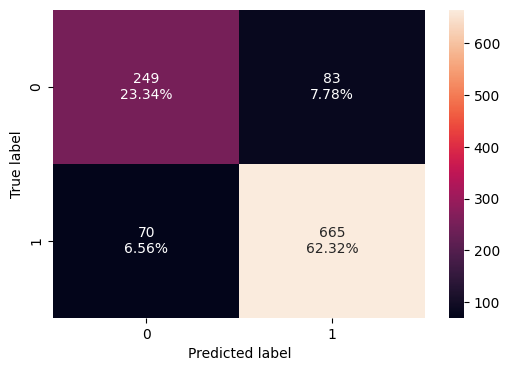

In [196]:
confusion_matrix_statsmodels(
    dt_tuned, x_train, y_train, threshold=0.5
)

dt_tuned_model_train_perf_threshold_main1 = model_performance_classification_statsmodels(
    dt_tuned, x_train, y_train, threshold=0.5
)
print("Train Data performance:")
print(dt_tuned_model_train_perf_threshold_main1)
print("=====================================================")

In [197]:
y_pd_dt_tuned_train=dt_tuned.predict(x_train)

print( confusion_matrix(y_train, y_pd_dt_tuned_train))
print( classification_report(y_train, y_pd_dt_tuned_train))

[[249  83]
 [ 70 665]]
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76       332
         1.0       0.89      0.90      0.90       735

    accuracy                           0.86      1067
   macro avg       0.83      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [198]:
y_pred_dt_tuned=dt_tuned.predict(x_test)

In [199]:
print( confusion_matrix(y_test, y_pred_dt_tuned))
print( classification_report(y_test, y_pred_dt_tuned))

[[ 98  32]
 [ 50 278]]
              precision    recall  f1-score   support

         0.0       0.66      0.75      0.71       130
         1.0       0.90      0.85      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.82      0.82       458



Test Data performance:
   Accuracy    Recall  Precision        F1
0  0.820961  0.847561   0.896774  0.871473


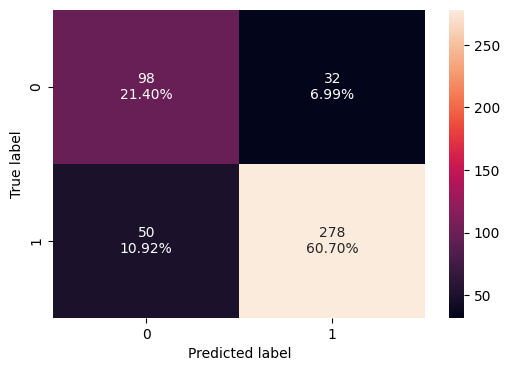

In [200]:
confusion_matrix_statsmodels(
    dt_tuned, x_test, y_test, threshold=0.5
)

dt_tuned_model_test_perf_threshold_main1 = model_performance_classification_statsmodels(
    dt_tuned, x_test, y_test, threshold=0.5
)
print("Test Data performance:")
print(dt_tuned_model_test_perf_threshold_main1)
print("=====================================================")

Hyper Parameter for Random Forest


In [201]:
rf_params={
    "max_depth": [3,5,8],
    "max_features": [2,3,5,7],
    "n_estimators": [5,10,15]}

In [202]:
%%time
mod_cv1=GridSearchCV(estimator=rf1,
            param_grid=rf_params,
            cv=10,
            scoring="f1",
            verbose=1)
mod_cv1.fit(x_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
CPU times: total: 1.64 s
Wall time: 7.47 s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 8], 'max_features': [2, 3, 5, 7],
                         'n_estimators': [5, 10, 15]},
             scoring='f1', verbose=1)

In [203]:
print(mod_cv1.best_estimator_)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=10,
                       random_state=1)


In [204]:
rf_tuned=RandomForestClassifier(max_depth=5, max_features=5, n_estimators=10,
                       random_state=1)
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=10,
                       random_state=1)

In [205]:
print(rf_tuned.score(x_train,y_train))

0.8716026241799437


In [206]:
print(rf_tuned.score(x_test,y_test))

0.8231441048034934


In [207]:
y_pd_rf_tuned_train=rf_tuned.predict(x_train)

print( confusion_matrix(y_train, y_pd_rf_tuned_train))
print( classification_report(y_train, y_pd_rf_tuned_train))

[[248  84]
 [ 53 682]]
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78       332
         1.0       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [208]:
y_pred_rf_tuned=rf_tuned.predict(x_test)

In [209]:
print( confusion_matrix(y_test, y_pred_rf_tuned))
print( classification_report(y_test, y_pred_rf_tuned))

[[ 89  41]
 [ 40 288]]
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69       130
         1.0       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Train Data performance:
   Accuracy    Recall  Precision        F1
0  0.871603  0.927891   0.890339  0.908728


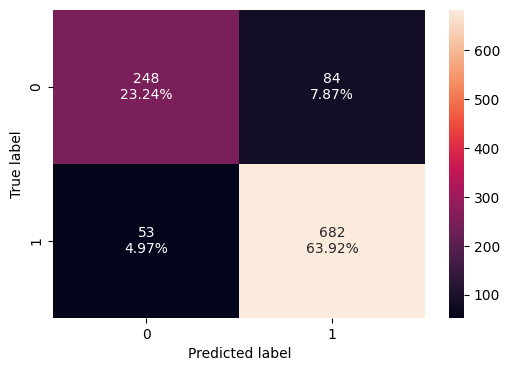

In [210]:
confusion_matrix_statsmodels(
    rf_tuned, x_train, y_train, threshold=0.5
)

rf_tuned_model_train_perf_threshold_main1 = model_performance_classification_statsmodels(
    rf_tuned, x_train, y_train, threshold=0.5
)
print("Train Data performance:")
print(rf_tuned_model_train_perf_threshold_main1)
print("=====================================================")

Test Data performance:
   Accuracy    Recall  Precision        F1
0  0.823144  0.878049    0.87538  0.876712


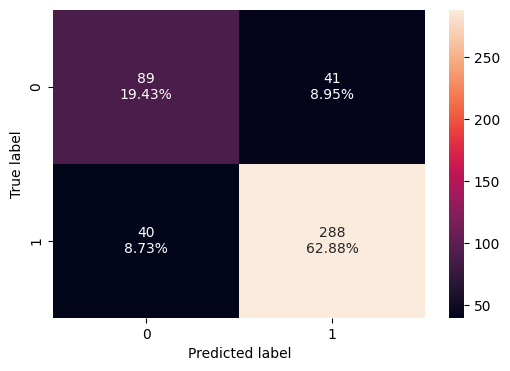

In [211]:
confusion_matrix_statsmodels(
    rf_tuned, x_test, y_test, threshold=0.5
)

rf_tuned_model_test_perf_threshold_main1 = model_performance_classification_statsmodels(
    rf_tuned, x_test, y_test, threshold=0.5
)
print("Test Data performance:")
print(rf_tuned_model_test_perf_threshold_main1)
print("=====================================================")